# Proyecto Individual 02: Data analytics
### Nombre: Ricardo Castro Peraza
### Github: RCastroPeraza

Instrucciones del proyecto llevado a cabo disponibles en:

https://github.com/soyHenry/PI_DA

# 1. Importación de librerías

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import seaborn as sns
import numpy as np

# 2. Importación de datasets

Debido al tamaño de los datos, no se pudo cargar los csv a GitHub, de tal manera que se proporciona el link al google drive para su descarga: https://drive.google.com/drive/folders/1TS76ok6giW7D_l5vc-zu5-cBU_dH3P5H

Recordar que debe de cambiarse la ruta de acuerdo a la ubicación de su preferencia para la revisión del código siguiente. 

In [4]:
#Usaré un sistema de códigos para facilitar el nombre de los datos
# cc=coursera courses
# cr=coursera reviews
# ec=edx courses
# uc=udemy courses

coursera_courses=pd.read_csv('Datasets/Coursera_courses.csv')
df_cc=pd.DataFrame(coursera_courses)
df_cc.head()

name  \
0                                   Machine Learning   
1                                  Indigenous Canada   
2                          The Science of Well-Being   
3                     Technical Support Fundamentals   
4  Become a CBRS Certified Professional Installer...   

                 institution  \
0        Stanford University   
1      University of Alberta   
2            Yale University   
3                     Google   
4  Google - Spectrum Sharing   

                                          course_url  \
0    https://www.coursera.org/learn/machine-learning   
1   https://www.coursera.org/learn/indigenous-canada   
2  https://www.coursera.org/learn/the-science-of-...   
3  https://www.coursera.org/learn/technical-suppo...   
4  https://www.coursera.org/learn/google-cbrs-cpi...   

                        course_id  
0                machine-learning  
1               indigenous-canada  
2       the-science-of-well-being  
3  technical-support-fundamentals  
4        google-cbrs-cpi-training

In [5]:
coursera_reviews=pd.read_csv('Datasets/Coursera_reviews.csv')
df_cr=pd.DataFrame(coursera_reviews)
df_cr.head()

reviews       reviewers  \
0  Pretty dry, but I was able to pass with just t...     By Robert S   
1  would be a better experience if the video and ...  By Gabriel E R   
2  Information was perfect! The program itself wa...      By Jacob D   
3  A few grammatical mistakes on test made me do ...       By Dale B   
4  Excellent course and the training provided was...       By Sean G   

   date_reviews  rating                 course_id  
0  Feb 12, 2020       4  google-cbrs-cpi-training  
1  Sep 28, 2020       4  google-cbrs-cpi-training  
2  Apr 08, 2020       4  google-cbrs-cpi-training  
3  Feb 24, 2020       4  google-cbrs-cpi-training  
4  Jun 18, 2020       4  google-cbrs-cpi-training

Voy a ver la posibilidad de unir los datasets de Coursera en uno solo

In [6]:
df_cc['course_id'].value_counts()

course_id
machine-learning                             1
english-composition                          1
wharton-communication-skills                 1
introduction-trading-machine-learning-gcp    1
python-programming-introduction              1
                                            ..
solar-energy-basics                          1
bootstrap-4                                  1
google-cloud-java-spring                     1
forensic-science                             1
data-science-course                          1
Name: count, Length: 623, dtype: int64

In [7]:
df_cr['course_id'].value_counts()

course_id
python                                        45218
machine-learning                              35895
neural-networks-deep-learning                 35750
technical-support-fundamentals                35319
python-data                                   33546
                                              ...  
social-economic-networks                          6
intro-to-healthcare                               6
entrepreneurship-strategy                         6
epigenetics                                       6
building-modern-python-applications-on-aws        3
Name: count, Length: 604, dtype: int64

A primera vista parece que hay más cursos ID en el df_cc que en df_cr, también que hay multiples "reviews" de cursos más populares tales como Python y Machine Learning que cursos más especializados como el de Epigenética. <br>
Para evitar perder información, y en vista del objetivo de analizar el impacto de diversas variables en las ventas, dejarémos los datasets de esa manera

In [8]:
edx_courses=pd.read_csv('Datasets/edx_courses.csv')
df_ec=pd.DataFrame(edx_courses)
df_ec.head()

title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   
3                                 The Analytics Edge   
4  Marketing Analytics: Marketing Measurement Str...   

                                             summary n_enrolled  \
0  Learn essential strategies for successful onli...    124,980   
1  This course is a "no prerequisite" introductio...    293,864   
2  An introduction to the intellectual enterprise...  2,442,271   
3  Through inspiring examples and stories, discov...    129,555   
4     This course is part of a MicroMasters® Program     81,140   

                           course_type                            institution  \
0              Self-paced on your time                                    edX   
1              Self-paced on your time             The University of Michigan   
2              Self-paced on your time                     Harvard University   
3  Instructor-led on a course schedule  Massachusetts Institute of Technology   
4              Self-paced on your time     University of California, Berkeley   

                                         instructors         Level  \
0            Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory   
1                                  Charles Severance  Introductory   
2                 David J. Malan-Doug Lloyd-Brian Yu  Introductory   
3  Dimitris Bertsimas-Allison O'Hair-John Silberh...  Intermediate   
4                                     Stephan Sorger  Introductory   

                        subject language subtitles         course_effort  \
0  Education & Teacher Training  English   English    2–3 hours per week   
1              Computer Science  English   English    2–4 hours per week   
2              Computer Science  English   English   6–18 hours per week   
3    Data Analysis & Statistics  English   English  10–15 hours per week   
4              Computer Science  English   English    5–7 hours per week   

  course_length                                         price  \
0       2 Weeks   FREE-Add a Verified Certificate for $49 USD   
1       7 Weeks   FREE-Add a Verified Certificate for $49 USD   
2      12 Weeks   FREE-Add a Verified Certificate for $90 USD   
3      13 Weeks  FREE-Add a Verified Certificate for $199 USD   
4       4 Weeks  FREE-Add a Verified Certificate for $249 USD   

                                  course_description  \
0  Designed for those who are new to elearning, t...   
1  This course aims to teach everyone the basics ...   
2  This is CS50x , Harvard University's introduct...   
3  In the last decade, the amount of data availab...   
4  Begin your journey in a new career in marketin...   

                                     course_syllabus  \
0  Welcome - We start with opportunities to meet ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          course_url  
0     https://www.edx.org/course/how-to-learn-online  
1  https://www.edx.org/course/programming-for-eve...  
2  https://www.edx.org/course/cs50s-introduction-...  
3      https://www.edx.org/course/the-analytics-edge  
4  https://www.edx.org/course/marketing-analytics...

In [9]:
udemy_courses=pd.read_csv('Datasets/udemy_courses.csv')
df_uc=pd.DataFrame(udemy_courses)
df_uc.head()

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

   content_duration   published_timestamp           subject  
0               1.5  2017-01-18T20:58:58Z  Business Finance  
1              39.0  2017-03-09T16:34:20Z  Business Finance  
2               2.5  2016-12-19T19:26:30Z  Business Finance  
3               3.0  2017-05-30T20:07:24Z  Business Finance  
4               2.0  2016-12-13T14:57:18Z  Business Finance

# 3. Eliminación de datos irrelevatantes

In [10]:
df_uc.head()

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

   content_duration   published_timestamp           subject  
0               1.5  2017-01-18T20:58:58Z  Business Finance  
1              39.0  2017-03-09T16:34:20Z  Business Finance  
2               2.5  2016-12-19T19:26:30Z  Business Finance  
3               3.0  2017-05-30T20:07:24Z  Business Finance  
4               2.0  2016-12-13T14:57:18Z  Business Finance

In [11]:
df_cc.drop(['course_url'],axis=1,inplace=True) #Esta columna se borra porque no necesito el acceso al sitio web para mi objetivo
df_cr.drop(['reviews','reviewers','date_reviews'],axis=1,inplace=True) #La columna review podría ser utilizada para hacer un modelo de predicción (ML) sobre el gusto de los usuarios
#Encuentro alguna aplicación potencial pero debido a la premura del proyecto, será mejor eliminarla
df_ec.drop(['instructors','course_url'],axis=1,inplace=True) #Misma conclusión que para cc y también los instructors pierden importancia en vista del nombre de la institución
df_uc.drop(['url','content_duration','published_timestamp'],axis=1,inplace=True) #El content_duration no es clara en la información provista y el published_timestamp no es relevante

# 4. Imputación y eliminación de nulos

### Coursera

In [12]:
null_percentages = []
total_rows = len(df_cc)
for column in df_cc.columns:
    null_count = df_cc[column].isnull().sum()
    null_percentage = (null_count / total_rows) * 100
    null_percentages.append(null_percentage)

# Imprimir los porcentajes de valores nulos
print("Los nulos del Coursera Courses:")
for i, column in enumerate(df_cc.columns):
    print(f"{column}: {null_percentages[i]:.2f}%")

Los nulos del Coursera Courses:
name: 0.00%
institution: 0.00%
course_id: 0.00%


Los datos de CC están completos. No es necesario ningún cambio.

In [13]:
null_percentages = []
total_rows = len(df_cr)
for column in df_cr.columns:
    null_count = df_cr[column].isnull().sum()
    null_percentage = (null_count / total_rows) * 100
    null_percentages.append(null_percentage)

# Imprimir los porcentajes de valores nulos
print("Nulos en Coursera Reviews:")
for i, column in enumerate(df_cr.columns):
    print(f"{column}: {null_percentages[i]:.2f}%")

Nulos en Coursera Reviews:
rating: 0.00%
course_id: 0.00%


Hay un 0.01 de nulso en la columna review. Habrá que imputar información

In [14]:
df_cr.head()

rating                 course_id
0       4  google-cbrs-cpi-training
1       4  google-cbrs-cpi-training
2       4  google-cbrs-cpi-training
3       4  google-cbrs-cpi-training
4       4  google-cbrs-cpi-training

### Edx

In [15]:
null_percentages = []
total_rows = len(df_ec)
for column in df_ec.columns:
    null_count = df_ec[column].isnull().sum()
    null_percentage = (null_count / total_rows) * 100
    null_percentages.append(null_percentage)

# Imprimir los porcentajes de valores nulos
print("Nulos en Edx Courses:")
for i, column in enumerate(df_ec.columns):
    print(f"{column}: {null_percentages[i]:.2f}%")

Nulos en Edx Courses:
title: 0.00%
summary: 5.44%
n_enrolled: 12.31%
course_type: 0.00%
institution: 0.00%
Level: 0.00%
subject: 0.00%
language: 0.00%
subtitles: 0.31%
course_effort: 0.00%
course_length: 0.00%
price: 0.00%
course_description: 4.10%
course_syllabus: 57.54%


In [16]:
df_ec['summary']

0      Learn essential strategies for successful onli...
1      This course is a "no prerequisite" introductio...
2      An introduction to the intellectual enterprise...
3      Through inspiring examples and stories, discov...
4         This course is part of a MicroMasters® Program
                             ...                        
970    Learn about the latest in prevention, police a...
971    Fantastic experiences in beauty and its repres...
972    This course explains the mathematical and comp...
973    What is a sustainable city? Learn the basics h...
974    Understand trigonometric, exponential and loga...
Name: summary, Length: 975, dtype: object

El summary es el resumen del curso, siendo una variable muy importante para comprender de manera general los temas a tratar. Lo dejarémos.<br>
Para evitar ruido que pueda otorgar la imputación de nulos, dejaré la variable así. Para contruir la wordcloud con la información brindada.

In [17]:
df_ec['n_enrolled']

0        124,980
1        293,864
2      2,442,271
3        129,555
4         81,140
         ...    
970          NaN
971          NaN
972       11,246
973        8,775
974          NaN
Name: n_enrolled, Length: 975, dtype: object

In [18]:
df_ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   Level               975 non-null    object
 6   subject             975 non-null    object
 7   language            975 non-null    object
 8   subtitles           972 non-null    object
 9   course_effort       975 non-null    object
 10  course_length       975 non-null    object
 11  price               975 non-null    object
 12  course_description  935 non-null    object
 13  course_syllabus     414 non-null    object
dtypes: object(14)
memory usage: 106.8+ KB


n_enrolled parece ser el número de suscritos al curso. Un dato sumamente importante. Previo a la imputación, verificaré si existen valores de n_enrolled iguales a 0, esto para, en caso de querer imputar con dicho valor, no genere ruido ya que el primer caso puede haber cursos que sean impopulares y tener 0 suscritos, por otro lado, el imputar con 0 valores NaN puede generar confusión en el análisis

In [19]:
df_ec[df_ec['n_enrolled']=='0']

Empty DataFrame
Columns: [title, summary, n_enrolled, course_type, institution, Level, subject, language, subtitles, course_effort, course_length, price, course_description, course_syllabus]
Index: []

Al parecer no existen cursos con valor 0, imputare con ese valor para realizar el análisis de comportamiento de esa variable posteriormente. 

In [20]:
df_ec['n_enrolled'].fillna('0',inplace=True)

In [21]:
df_ec['subtitles']

0          English
1          English
2          English
3          English
4          English
          ...     
970        English
971    English, 中文
972        English
973        English
974        English
Name: subtitles, Length: 975, dtype: object

La información de subtítulos resulta relevante por lo que unicamente imputare los nulos con un valor "estándar"

In [22]:
df_ec['subtitles'].fillna('No info available',inplace=True)

In [23]:
df_ec['course_description'] 

0      Designed for those who are new to elearning, t...
1      This course aims to teach everyone the basics ...
2      This is CS50x , Harvard University's introduct...
3      In the last decade, the amount of data availab...
4      Begin your journey in a new career in marketin...
                             ...                        
970    The high rates of crime and violence are two o...
971    Are you an original designer? Or a DIY fancier...
972    What happens in your brain when you make a dec...
973    According to the United Nations, urbanization ...
974    This course is part two of the MathTrackX XSer...
Name: course_description, Length: 975, dtype: object

Esta variable es muy importante, de igual manera que summary la dejaré sin modificar para obtener un wordcloud más preciso <br>
Por último, la variable Course Syllabus a pesar de ser de utilidad tiene más de la mitad de los valores Nulos, de manera que modificar implicaría la creación de una columna sintética, por tal motivo, es eliminada

In [24]:
df_ec.drop(['course_syllabus'],axis=1,inplace=True)

### Udemy

In [25]:
null_percentages = []
total_rows = len(df_uc)
for column in df_uc.columns:
    null_count = df_uc[column].isnull().sum()
    null_percentage = (null_count / total_rows) * 100
    null_percentages.append(null_percentage)

# Imprimir los porcentajes de valores nulos
print("Nulos en Udemy Courses:")
for i, column in enumerate(df_uc.columns):
    print(f"{column}: {null_percentages[i]:.2f}%")

Nulos en Udemy Courses:
course_id: 0.00%
course_title: 0.00%
is_paid: 0.00%
price: 0.00%
num_subscribers: 0.00%
num_reviews: 0.00%
num_lectures: 0.00%
level: 0.00%
subject: 0.00%


El dataset está listo

# 5. Nube de palabras 
Para evaluar la frecuencia de aparición de variables categóricas tales como el título, institución, summary, etc. Se prosigue a generar una nube de palabras por las variables antes mencionadas. Se optó por segmentar por base de datos, es decir, generar una específica para para Coursera, Udemy y para Edx esto porque, existen algunas plataformas que son más populares por cursos de índole informática, otros por sociales, etc. 

### Coursera

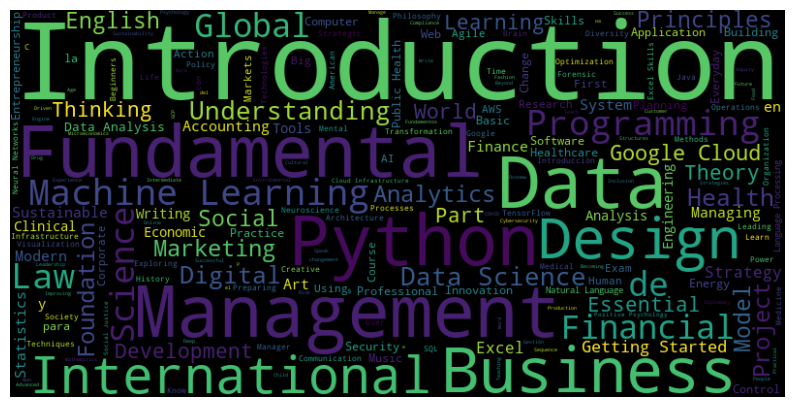

In [26]:
all_titles_cc = ' '.join(df_cc['name'])
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(all_titles_cc)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusión de Nube de Palabras de Títulos Coursera: Parece ser que existe una mezcla de palabras más comunes, aquellas de índole de las ciencias computaciones tales como JavaScript, Web Development, HTML y otras de música como Piano, Guitarra. También resulta relevante la importante de la cursos introductorios y de entrenamiento para llamar la atención. El título es el primer acercamiento del posible consumidor con el producto.

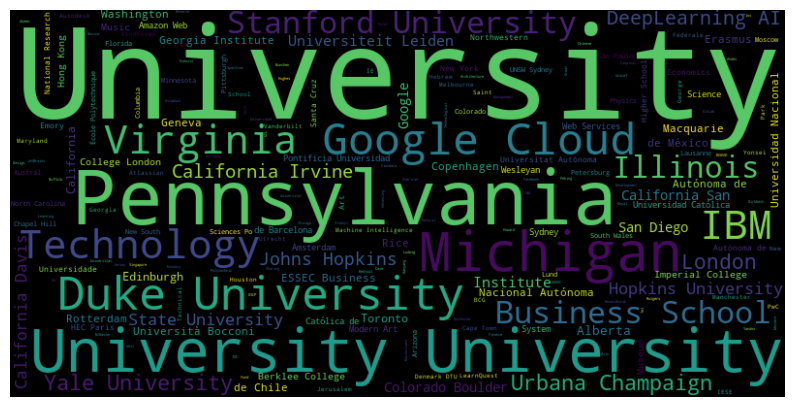

In [27]:
all_institution_cc = ' '.join(df_cc['institution'])
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(all_institution_cc)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusiones Nube de palabras Instituciones de Coursera: Las universidades estadounidenses parecen liderar la oferta de cursos brindados, Duke University conocida por su enfoque de negocios, Business School, University of Pennsylvania son algunas de las más enfocadas en el ámbito empresarial. También llama la atención la presencia de Google Cloud y de IBM dos empresa que han ofertados cursos en el área de informática. 

### Edx

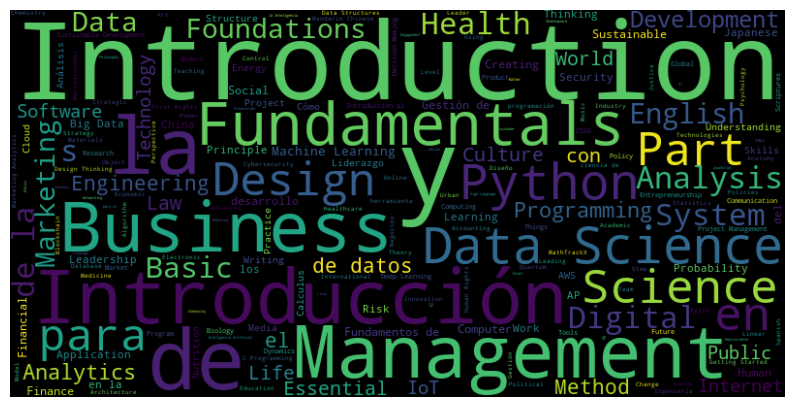

In [28]:
all_titles_ec = ' '.join(df_ec['title'])
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(all_titles_ec)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusión de Nube de Palabras de Títulos de Edx: Al igual que con Coursera, aquellos cursos que presentan introducción a temas parecen ser más relevantes, aunque es notable la importancia de un enfoque de negocio por la presencia de Business y de Management. También la relevante de la Data Science, Python, Analysis. Algo de importancia a tomar en cuenta es que presentan palabras en inglés y en español, algo que no se observó en coursera, esto genera ruido porque palabras como Introduction e Introducción pudieran estar juntas, aumentando su presencia en la nube de palabras. Edx a primera mano, tiene un enfoque más orientado a la ciencia de datos y negocios.

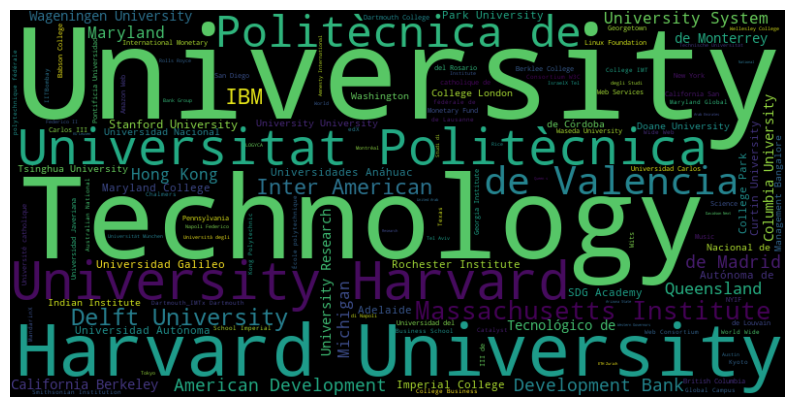

In [29]:
all_institution_ec = ' '.join(df_ec['institution'])
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(all_institution_ec)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusiones Nube de Palabras de Instituciones Edx: Se observa una mayor diversidad de nacionalidades en las instituciones a diferencia de Coursera, la Universidad Politécnica de Valencia (por su nombre en español, en la imagen está en valenciano), es conocida por su enfoque en energías, salud y recursos. Por otro lado se observa la gran presencia de Harvard escuela de negocios y leyes de EEUU. 

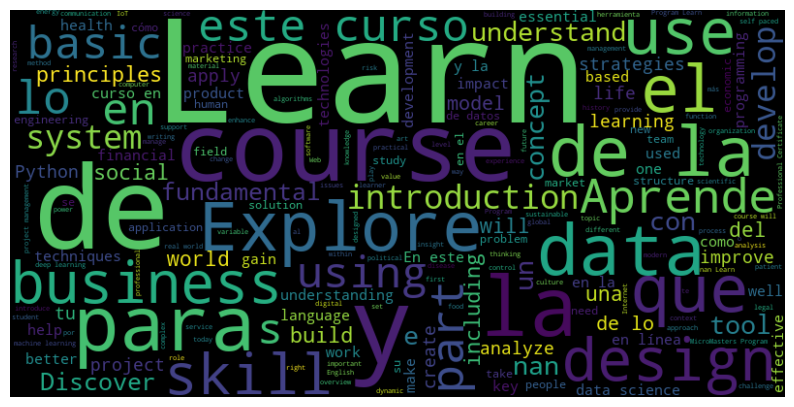

In [30]:
all_summary_ec = ' '.join(df_ec['summary'].astype(str))
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(all_summary_ec)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusión de Nube de Palabras de Summary de Edx: A pesar de ser a primera vista llamativa, esta variable aporta poco con la nube de palabras por la presencia de palabras genéricas a la hora de describir cursos: learn, course, explroe, aprende, introducción, etc. De tal manera que se opta por borrar del dataset. 

In [31]:
df_ec.drop(['summary'],axis=1,inplace=True)

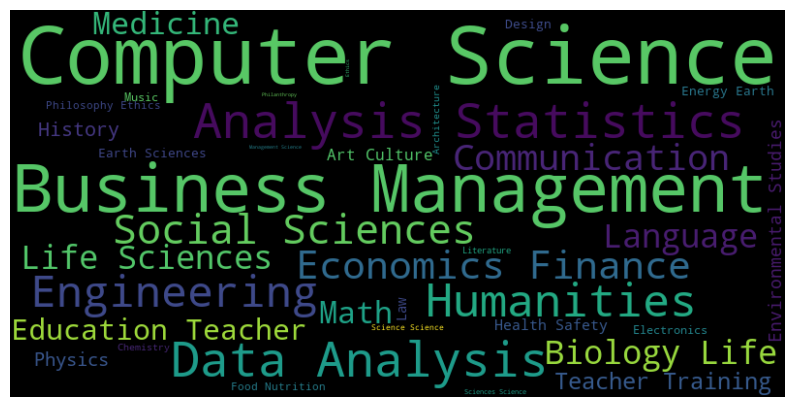

In [32]:
all_subject_ec = ' '.join(df_ec['subject'].astype(str))
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(all_subject_ec)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusión de Nube de Palabras de Subjetcs de Edx: llama la atención la poca cantidad de palabras, esto significa que es posible filtrar por temas utilizando un diagrama de columnas. Corroborando la información anterior, Edx, parece ser una plataforma enfocada en las cienicas computaciones y el manejo de negocios, incorporando en su catálogoc otros cursos como la ingeniería, humanidades, educación y biología.

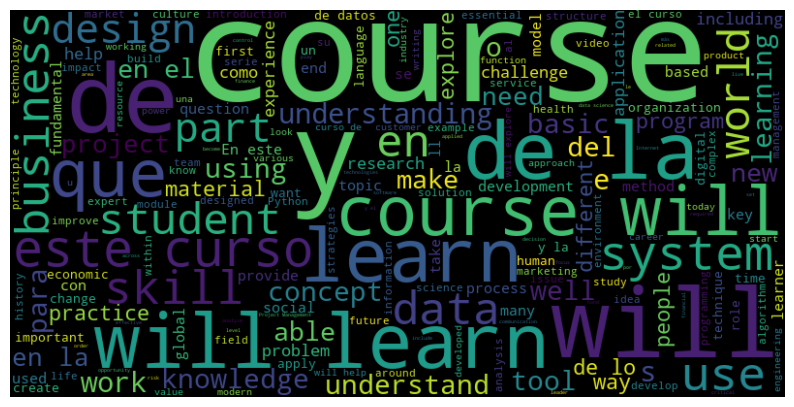

In [33]:
all_course_description_ec = ' '.join(df_ec['course_description'].astype(str))
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(all_course_description_ec)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusión de Nube de Palabras de Course Description de Edx: A pesar de ser a primera vista llamativa, esta variable aporta poco con la nube de palabras por la presencia de palabras genéricas a la hora de describir cursos: learn, course, explroe, aprende, introducción, etc. De tal manera que se opta por borrar del dataset. Cabe recalcar la capacidad de generar un modelo de ML aplicable al caso de análisis, sin embargo, por motivos de tiempo, no se procede a realizar. 

In [34]:
df_ec.drop(['course_description'],axis=1,inplace=True)

### Udemy

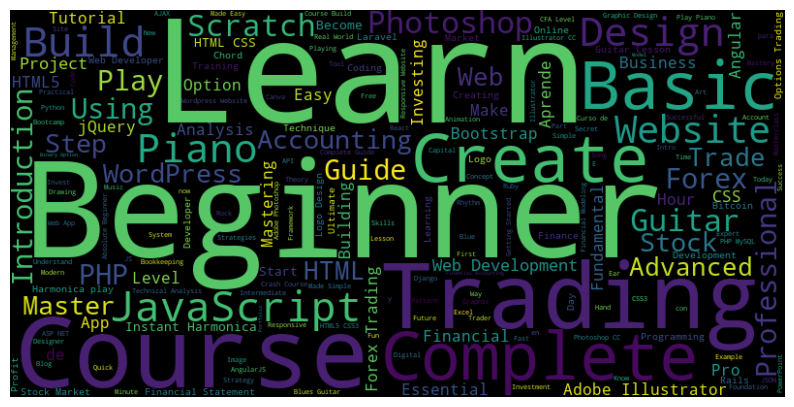

In [35]:
all_titles_uc = ' '.join(df_uc['course_title'])
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(all_titles_uc)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Conclusiones de Títulos de Udemy: Se favorece la presencia de cursos introductorios, principalmente enfocados en ciencias computacionales, a diferencia de Edx y Coursera, se observa la presencia de cursos de arte como piano y Guitar y de diseño como Photoshop y Adobe Illustrator.

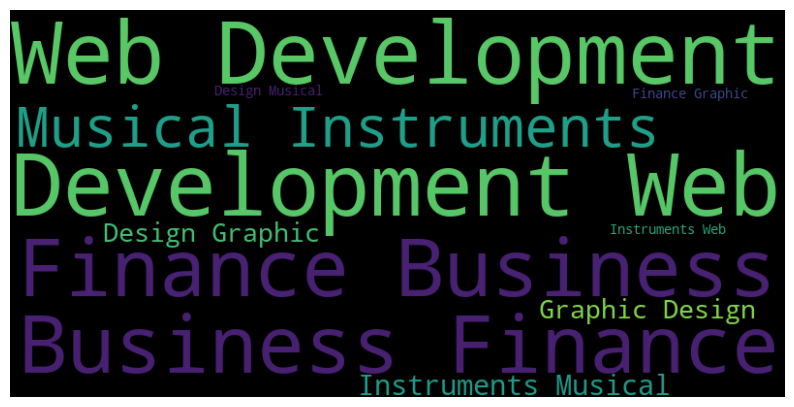

In [36]:
all_subject_uc = ' '.join(df_uc['subject'])
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(all_subject_uc)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Conclusiones de Nube de Palabras Subject de Udemy: Es posible observar un mejor comportamiento mediante un gráfico de columnas. Se observan 3 grandes tópicos en la oferta de Udemy: Web Development (que en la imagen aparece separado a Development Web), Finance Business (equiparable a Business Finance) y Musical Instruments

Por último, se propone la generación de 3 nubes de palabras colectivas para los títulos, instituciones y subjects de los catálogos

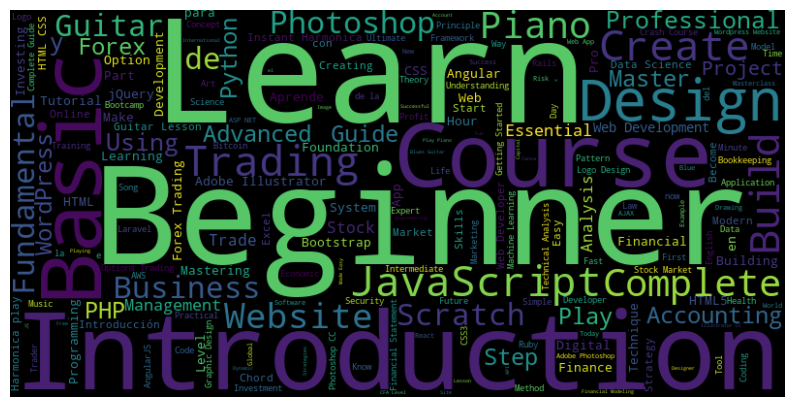

In [37]:
combined_titles = all_titles_uc + ' ' + all_titles_ec + ' ' + all_titles_cc
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(combined_titles)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusión de Oferta Completa de Títulos: Los Títulos que parecen ser más populares para ofertar en MOOCs provistas son los introductorios, enfatizando la inclusión de palabras como Beginner, Course, Trading y Basic.

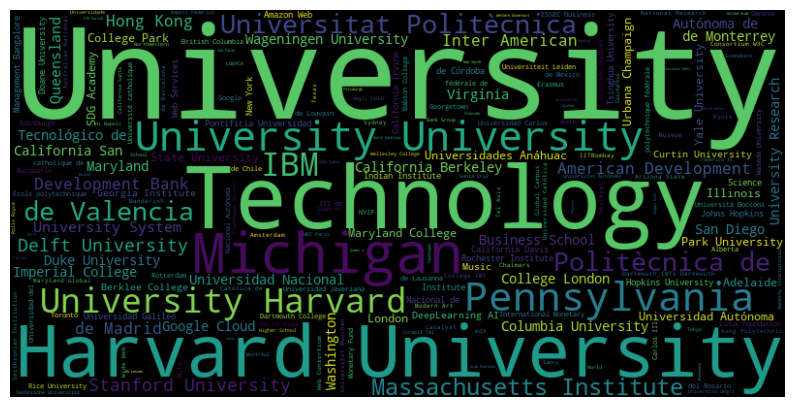

In [38]:
combined_instituion =all_institution_ec + ' ' + all_institution_cc
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(combined_instituion)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusiones de Oferta de Instituciones Completa: De acuerdo a la frecuencia completa, parece ser que la predominancia es de universidades estadounidenses: Harvard, Pennsylvania, Micigan. En un segundo plano, se encuentra IBM, la universidad de Valencia, el MIT y llama la atención la oferta de universidades extranjeras como Indian Institute (India), Universidades Anahuac (México) y el Tecnológico de Monterrey (México).

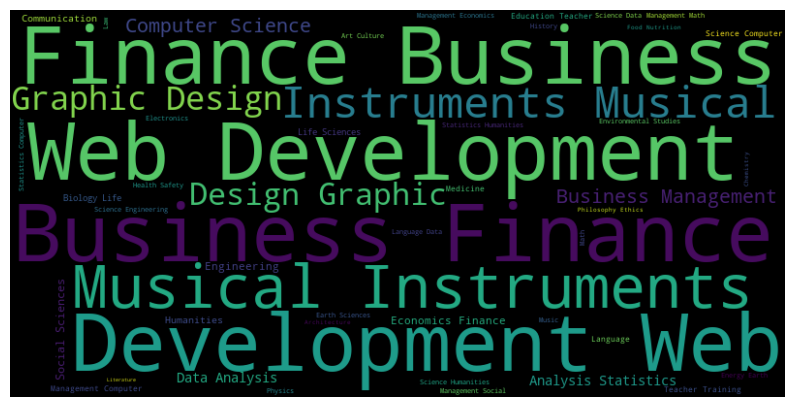

In [39]:
combined_subject = all_subject_uc + ' ' + all_subject_ec + ' '
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(combined_subject)

# Configura y muestra la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusiones de Oferta completa de Subject: Podríamos concluir que existen 3 grandes áreas del conocimiento obtenido por las MOOCs: Ciencias Computaciones, Enfoque de Negocios y Diseño y Arte. 

# 6. Relación de variables

Primero, evaluarémos el comportamiento de las variables categóricas mediante un diagrama de columnas

### Edx

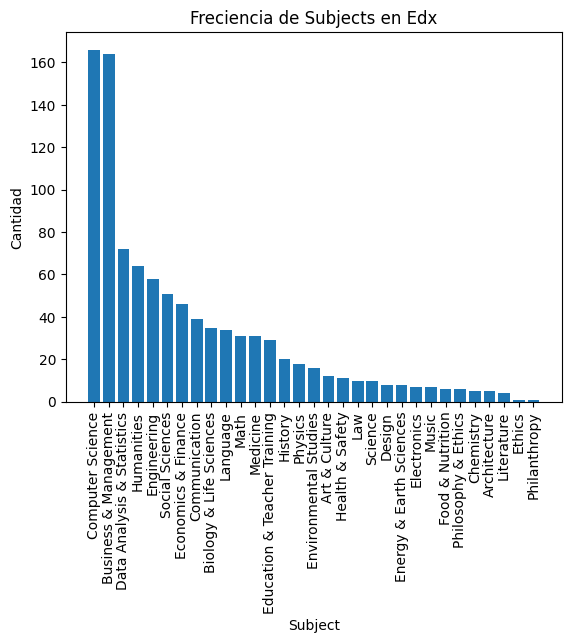

In [40]:
# Obtener el recuento de valores únicos en la columna 'subject'
subject_counts_ec = df_ec['subject'].value_counts()

# Ordenar los valores de mayor a menor
subject_counts_sorted_ec = subject_counts_ec.sort_values(ascending=False)

# Crear el diagrama de columnas
plt.bar(subject_counts_sorted_ec.index, subject_counts_sorted_ec.values)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Etiquetas y título del gráfico
plt.xlabel('Subject')
plt.ylabel('Cantidad')
plt.title('Freciencia de Subjects en Edx')

# Mostrar el gráfico
plt.show()


Conclusiones gráfica de columnas de Subject para Edx: Se observa una tendencia a brindar cursos enfocados en tecnologías observable por la frecuencia de Computer Science y Data Analysis & Statistics, por otra lado también se observa una variedad donde predominan las ciencias sociales: Humanidades, Social Sciences y Comunicación. También, es importa la versatilidad de Data Analysis & Statistics siendo posible de vincular con la oferta de Business & Management y Econocmics & Finance.

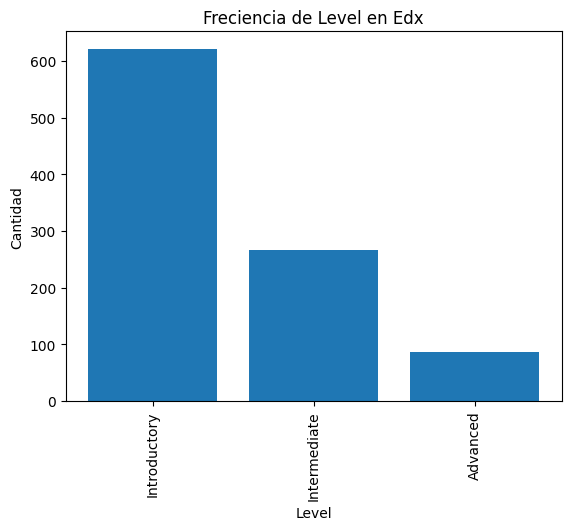

In [41]:
# Obtener el recuento de valores únicos en la columna 'level'
level_counts_ec = df_ec['Level'].value_counts()

# Ordenar los valores de mayor a menor
level_counts_sorted_ec = level_counts_ec.sort_values(ascending=False)

# Crear el diagrama de columnas
plt.bar(level_counts_sorted_ec.index, level_counts_sorted_ec.values)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Etiquetas y título del gráfico
plt.xlabel('Level')
plt.ylabel('Cantidad')
plt.title('Freciencia de Level en Edx')

# Mostrar el gráfico
plt.show()

Conclusiones de Gráfico de Barras Level de Edx: La mayoría de los cursos pertenecen a un nivel introductorio. Por otro lado, se escasa de cursos especializados avanzados. 

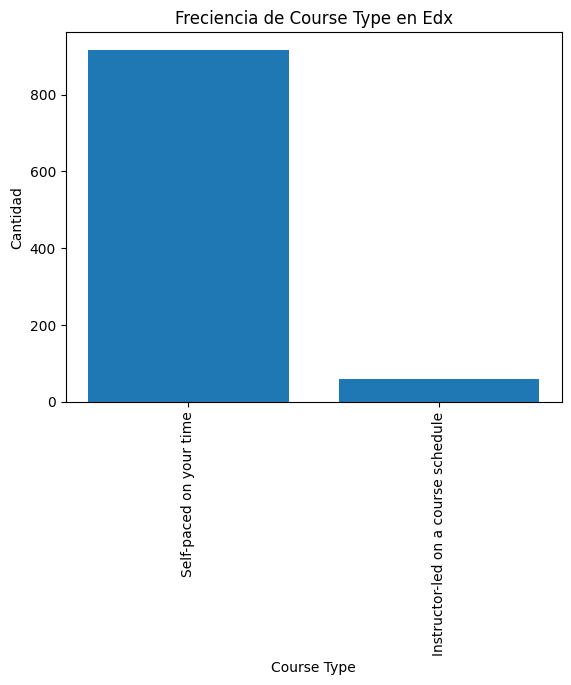

In [42]:
# Obtener el recuento de valores únicos en la columna 'course_type'
course_type_counts_ec = df_ec['course_type'].value_counts()

# Ordenar los valores de mayor a menor
course_type_counts_sorted_ec = course_type_counts_ec.sort_values(ascending=False)

# Crear el diagrama de columnas
plt.bar(course_type_counts_sorted_ec.index, course_type_counts_sorted_ec.values)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Etiquetas y título del gráfico
plt.xlabel('Course Type')
plt.ylabel('Cantidad')
plt.title('Freciencia de Course Type en Edx')

# Mostrar el gráfico
plt.show()

Conclusiones Gráfico de Barras Course Type de Edx: Casi la totalidad de los cursos se enfocan en un contenido disponible para su consulta al tiempo del estudiante. Pareciera ser un mejor enfoque de negocio complementandolo con el level, podemos concluir que los cursos introductorios y de self-paced on your time son los más comunes de encontrar en el catálogo de Edx. 

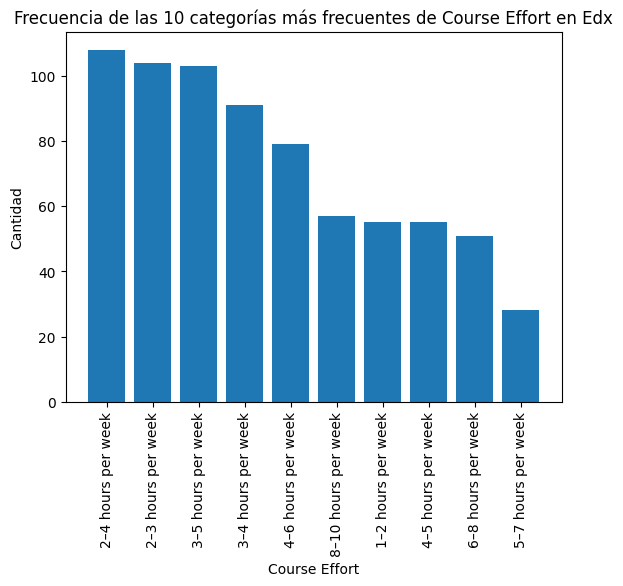

In [43]:
# Obtener el recuento de valores únicos en la columna 'course_effort'
course_effort_counts_ec = df_ec['course_effort'].value_counts()

# Obtener las 10 categorías más frecuentes
top_10_categories_ec = course_effort_counts_ec.head(10)

# Ordenar los valores de mayor a menor
top_10_categories_sorted_ec = top_10_categories_ec.sort_values(ascending=False)

# Crear el diagrama de columnas
plt.bar(top_10_categories_sorted_ec.index, top_10_categories_sorted_ec.values)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Etiquetas y título del gráfico
plt.xlabel('Course Effort')
plt.ylabel('Cantidad')
plt.title('Frecuencia de las 10 categorías más frecuentes de Course Effort en Edx')

# Mostrar el gráfico
plt.show()


Conclusiones Gráfico de Barras de  Course Effort de Edx: La mayoría de los cursos oscilan entre 2-4 h, 2-3 h y 3-5 h, a partir de este valor se observa un cambio más pronunciado que significa menor frecuencia. NOTA: Se limitaron a las 10 más frecuentes, debido a la gran cantidad de valores diferentes que tiene esta variable. 

A partir de esta información, se procede a transformar la variable Course_effort a una numérica empleando la marca de clase de cada intervalo dado, es decir, la media entre los valores otorgados 

In [44]:

def get_average(value):
    # Buscar los números en el valor utilizando una expresión regular
    numbers = re.findall(r'\d+', value)
    
    # Obtener los dos números como enteros
    num1 = int(numbers[0])
    num2 = int(numbers[1])
    
    # Calcular el valor medio
    average = (num1 + num2) / 2
    
    # Devolver el valor medio como cadena de texto
    return average

In [45]:
# Crear una nueva columna "media_course_effort" aplicando la función a la columna "course_effort"
df_ec['media_course_effort'] = df_ec['course_effort'].apply(get_average)

Esta nueva variable la evaluarémos en el análisis de variables numéricas.

### Udemy

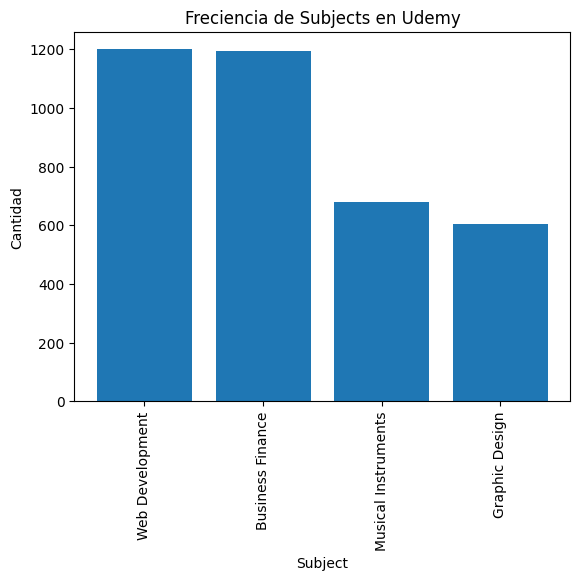

In [46]:
# Obtener el recuento de valores únicos en la columna 'subject'
subject_counts_uc = df_uc['subject'].value_counts()

# Ordenar los valores de mayor a menor
subject_counts_sorted_uc = subject_counts_uc.sort_values(ascending=False)

# Crear el diagrama de columnas
plt.bar(subject_counts_sorted_uc.index, subject_counts_sorted_uc.values)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Etiquetas y título del gráfico
plt.xlabel('Subject')
plt.ylabel('Cantidad')
plt.title('Freciencia de Subjects en Udemy')

# Mostrar el gráfico
plt.show()


Conclusiones Gráfico de Barras de Subject de Udemy: Únicamente se observa la presencia de 4 grandes ramas, donde predomina el Web Development equiparado con Business Finance. 

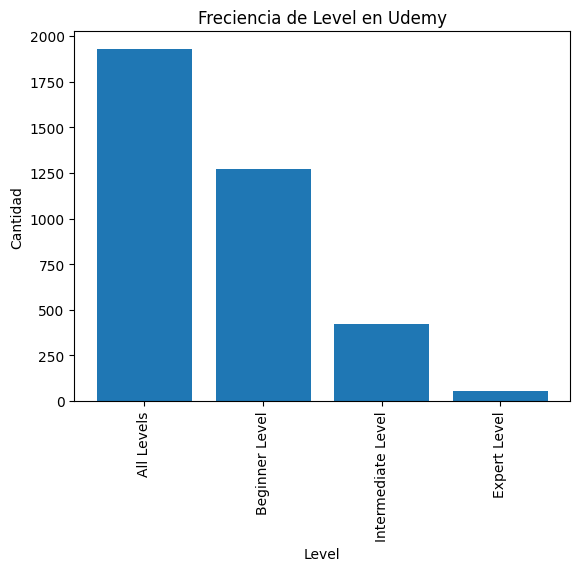

In [47]:
# Obtener el recuento de valores únicos en la columna 'subject'
level_counts_uc = df_uc['level'].value_counts()

# Ordenar los valores de mayor a menor
level_counts_sorted_uc = level_counts_uc.sort_values(ascending=False)

# Crear el diagrama de columnas
plt.bar(level_counts_sorted_uc.index, level_counts_sorted_uc.values)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Etiquetas y título del gráfico
plt.xlabel('Level')
plt.ylabel('Cantidad')
plt.title('Freciencia de Level en Udemy')

# Mostrar el gráfico
plt.show()

Conclusiones Gráfica de Barras de Level en Udemy: La variable All Levels es ambigüa, por experiencia previa en cursos puedo decir, que se trata de cursos que te brindan información básica con posibilidad de generar proyectos más avanzados como retos adicionales. Sin embargo, lo más importante es la la frecuencia predominante de Beginner Level, siendo la más frecuente. 

Ahora vincularémos variables numéricas observando las relaciones entre sí y observa si existe algún posible vinculo

El siguiente paso unirémos df_cc y df_cr utilizando el course_id y calculando el promedio del rating 

In [48]:
# Unir los DataFrames por el 'course_id'
merged_df = pd.merge(df_cc, df_cr, on='course_id', how='left')

# Calcular la media de la columna 'rating' agrupando por 'course_id'
media_rating = merged_df.groupby('course_id')['rating'].mean().reset_index()

# Renombrar la columna 'rating' como 'media_rating'
media_rating = media_rating.rename(columns={'rating': 'media_rating'})

# Unir la columna 'media_rating' al DataFrame original
df_cc = pd.merge(df_cc, media_rating, on='course_id', how='left')

### Edx

In [49]:
def extract_price(value):
    # Buscar el número en la cadena utilizando una expresión regular
    match = re.search(r'\d+', value)
    
    if match:
        # Devolver el número encontrado
        return match.group()
    else:
        # Devolver un valor predeterminado si no se encuentra ningún número
        return None

In [50]:
# Aplicar la función a la columna 'price' para extraer el número
df_ec['price_extracted'] = df_ec['price'].apply(extract_price)

In [51]:
def extract_length(value):
    # Dividir la cadena de texto en palabras
    parts = value.split()
    
    # Extraer el primer elemento de la lista
    length = parts[0]
    
    # Devolver el valor numérico
    return int(length)

In [52]:
# Aplicar la función a la columna 'course_length' para extraer el valor numérico
df_ec['length_extracted'] = df_ec['course_length'].apply(extract_length)

In [53]:
# Remover las comas de la columna 'n_enrolled'
df_ec['n_enrolled'] = df_ec['n_enrolled'].str.replace(',', '')

# Convertir la columna 'n_enrolled' a tipo numérico
df_ec['n_enrolled'] = pd.to_numeric(df_ec['n_enrolled'])

# Verificar el cambio de tipo de la columna 'n_enrolled'
print(df_ec['n_enrolled'].dtype)


int64


In [54]:
df_ec['price_extracted']=df_ec['price_extracted'].astype('int64')

In [55]:
df_ec.head()

title  n_enrolled  \
0                                How to Learn Online      124980   
1  Programming for Everybody (Getting Started wit...      293864   
2            CS50's Introduction to Computer Science     2442271   
3                                 The Analytics Edge      129555   
4  Marketing Analytics: Marketing Measurement Str...       81140   

                           course_type                            institution  \
0              Self-paced on your time                                    edX   
1              Self-paced on your time             The University of Michigan   
2              Self-paced on your time                     Harvard University   
3  Instructor-led on a course schedule  Massachusetts Institute of Technology   
4              Self-paced on your time     University of California, Berkeley   

          Level                       subject language subtitles  \
0  Introductory  Education & Teacher Training  English   English   
1  Introductory              Computer Science  English   English   
2  Introductory              Computer Science  English   English   
3  Intermediate    Data Analysis & Statistics  English   English   
4  Introductory              Computer Science  English   English   

          course_effort course_length  \
0    2–3 hours per week       2 Weeks   
1    2–4 hours per week       7 Weeks   
2   6–18 hours per week      12 Weeks   
3  10–15 hours per week      13 Weeks   
4    5–7 hours per week       4 Weeks   

                                          price  media_course_effort  \
0   FREE-Add a Verified Certificate for $49 USD                  2.5   
1   FREE-Add a Verified Certificate for $49 USD                  3.0   
2   FREE-Add a Verified Certificate for $90 USD                 12.0   
3  FREE-Add a Verified Certificate for $199 USD                 12.5   
4  FREE-Add a Verified Certificate for $249 USD                  6.0   

   price_extracted  length_extracted  
0               49                 2  
1               49                 7  
2               90                12  
3              199                13  
4              249                 4

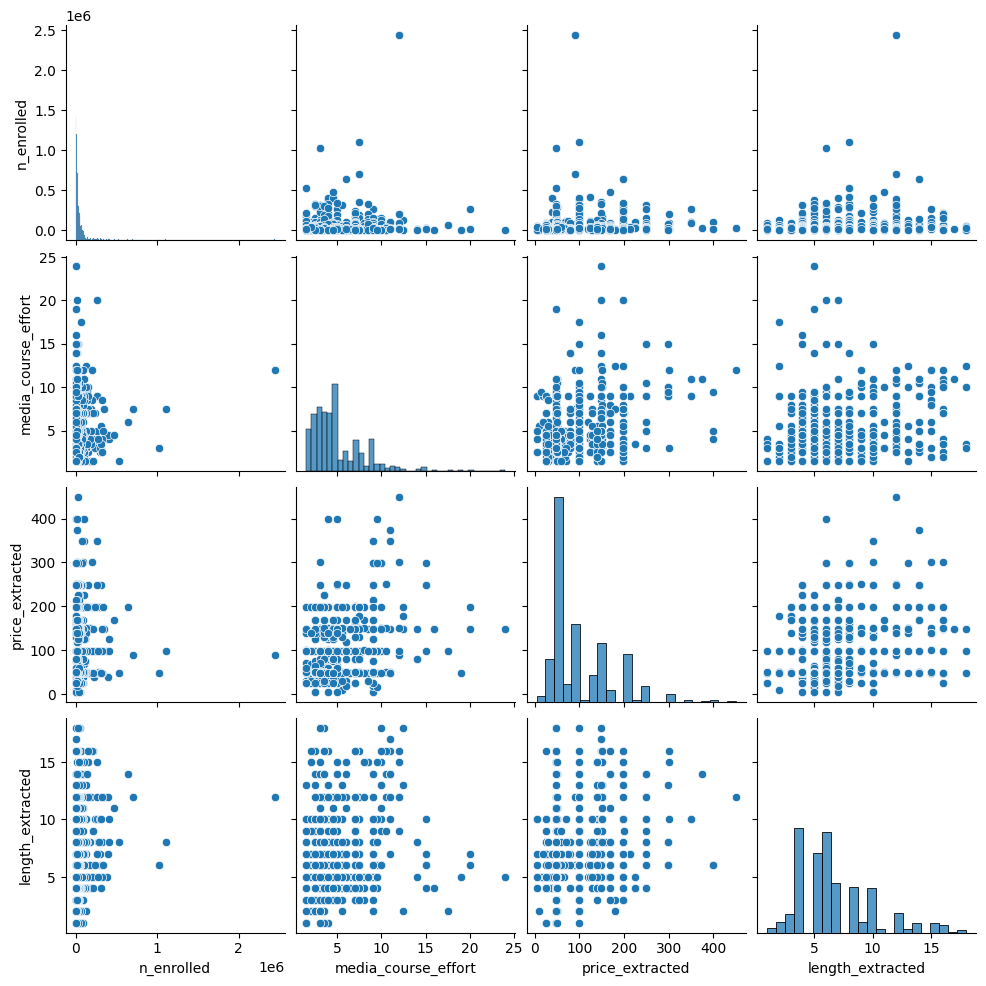

In [56]:
sns.pairplot(data=df_ec)

Para indagar más en la información provista, utilizaré diferentes variables categóricas de acuerdo al objetivo del proyecto.

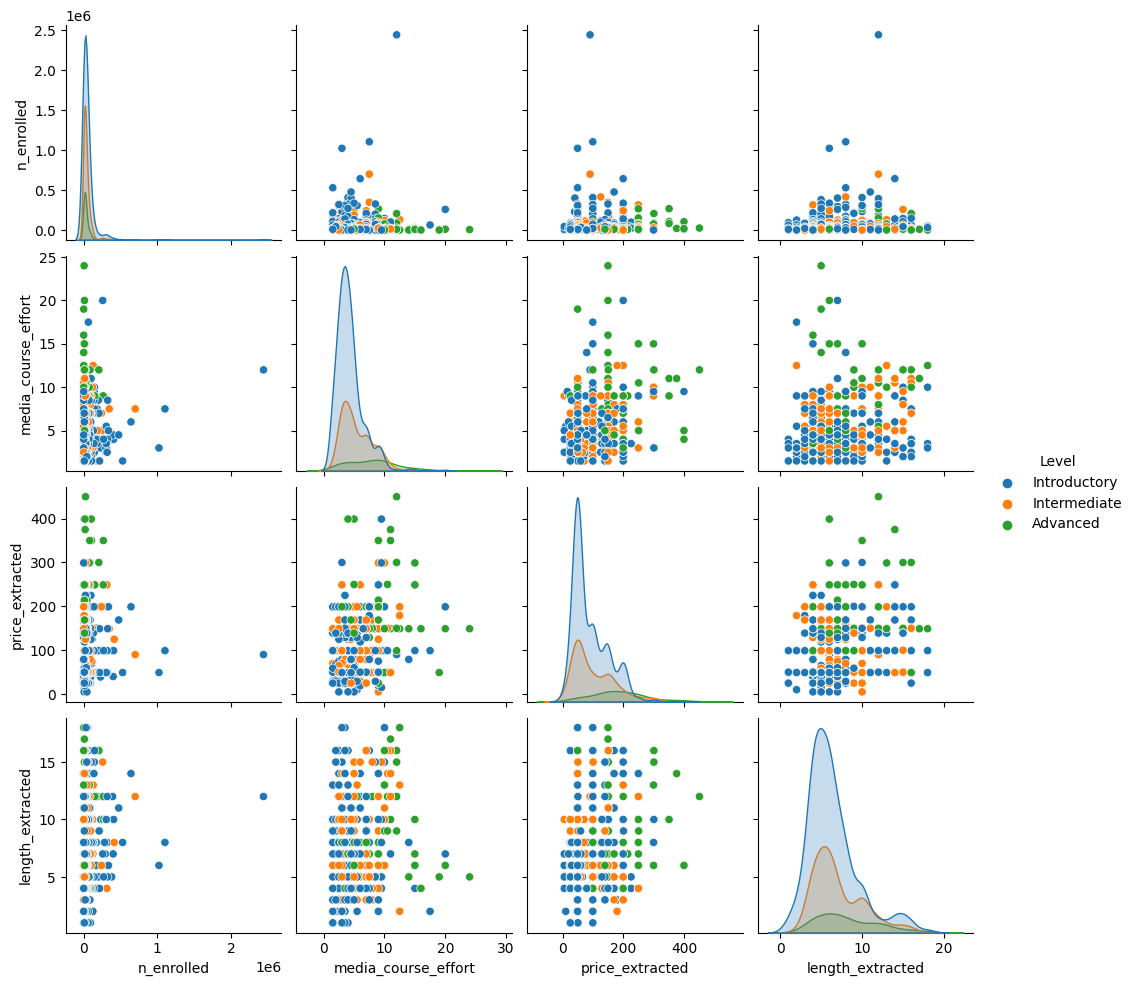

In [57]:
sns.pairplot(data=df_ec,hue='Level')

In [58]:
df_ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                975 non-null    object 
 1   n_enrolled           975 non-null    int64  
 2   course_type          975 non-null    object 
 3   institution          975 non-null    object 
 4   Level                975 non-null    object 
 5   subject              975 non-null    object 
 6   language             975 non-null    object 
 7   subtitles            975 non-null    object 
 8   course_effort        975 non-null    object 
 9   course_length        975 non-null    object 
 10  price                975 non-null    object 
 11  media_course_effort  975 non-null    float64
 12  price_extracted      975 non-null    int64  
 13  length_extracted     975 non-null    int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 106.8+ KB


In [59]:
df_ec['ingreso_por_curso'] = df_ec['price_extracted'] * df_ec['n_enrolled']
df_ec['ingreso_por_curso']=df_ec['ingreso_por_curso'].astype('Int64')

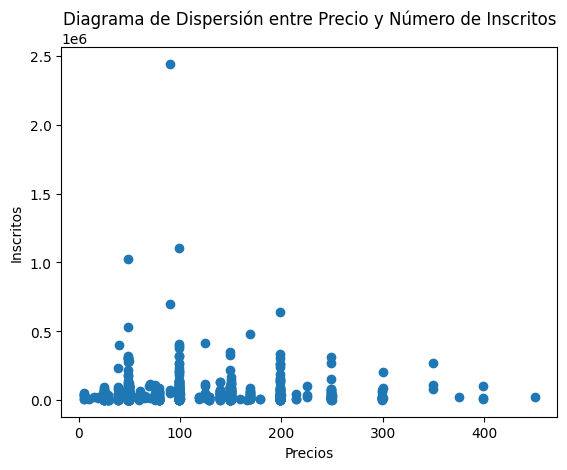

In [60]:
# Crear el scatter plot
plt.scatter(df_ec['price_extracted'], df_ec['n_enrolled'])

# Etiquetas de los ejes
plt.xlabel('Precios')
plt.ylabel('Inscritos')

# Título del gráfico
plt.title('Diagrama de Dispersión entre Precio y Número de Inscritos')

# Mostrar el gráfico
plt.show()

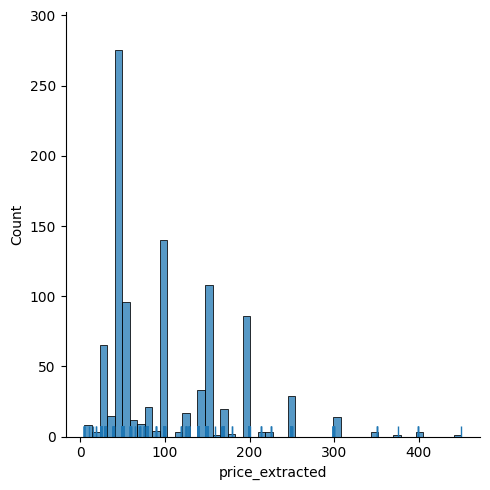

In [61]:
sns.displot(df_ec['price_extracted'], bins=50, rug = True)

Conclusión de Gráfico de Dispersión Precio e Inscritos y de Displot de Precio: La mayoría de los cursos se ubican por debajo de 100 dolares de precio, graficando contra inscritos también se observa que aquellos cursos por debajo o alrededor de este precio tienen una mayor cantidad de estudiantes inscritos. 

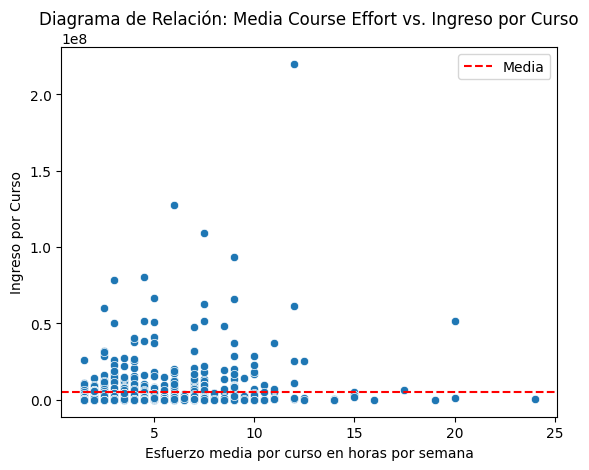

In [62]:
# Crear el diagrama de relación (scatter plot)
sns.scatterplot(data=df_ec, x='media_course_effort', y='ingreso_por_curso')

# Calcular la media de 'ingreso_por_curso'
mean_ingreso = df_ec['ingreso_por_curso'].mean()

# Dibujar una línea horizontal en la media de 'ingreso_por_curso'
plt.axhline(y=mean_ingreso, color='red', linestyle='--', label='Media')

# Etiquetas de los ejes
plt.xlabel('Esfuerzo media por curso en horas por semana')
plt.ylabel('Ingreso por Curso')

# Título del gráfico
plt.title('Diagrama de Relación: Media Course Effort vs. Ingreso por Curso')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Conclusión de Diagrama de Dispersión entre el esfuerzo medio por curso y el ingreso: Aquellos cursos con menor tiempo en horas por semana, a pesar de generar un ingreso relativamente bajo, representan una gran densidad que al final brinda un mayor impacto a nivel económico a Edx.

In [63]:
# Crear la columna "esfuerzo_total"
df_ec['esfuerzo_total'] = df_ec['media_course_effort'] * df_ec['length_extracted']

#Cabe recalcar que la variable media_course_effor es la marca de clase del intervalo de 
#horas por semana de dedicación al curso y la varible lenght_extracted representa las semanas
#generales para poder completar el curso
df_ec.head()

title  n_enrolled  \
0                                How to Learn Online      124980   
1  Programming for Everybody (Getting Started wit...      293864   
2            CS50's Introduction to Computer Science     2442271   
3                                 The Analytics Edge      129555   
4  Marketing Analytics: Marketing Measurement Str...       81140   

                           course_type                            institution  \
0              Self-paced on your time                                    edX   
1              Self-paced on your time             The University of Michigan   
2              Self-paced on your time                     Harvard University   
3  Instructor-led on a course schedule  Massachusetts Institute of Technology   
4              Self-paced on your time     University of California, Berkeley   

          Level                       subject language subtitles  \
0  Introductory  Education & Teacher Training  English   English   
1  Introductory              Computer Science  English   English   
2  Introductory              Computer Science  English   English   
3  Intermediate    Data Analysis & Statistics  English   English   
4  Introductory              Computer Science  English   English   

          course_effort course_length  \
0    2–3 hours per week       2 Weeks   
1    2–4 hours per week       7 Weeks   
2   6–18 hours per week      12 Weeks   
3  10–15 hours per week      13 Weeks   
4    5–7 hours per week       4 Weeks   

                                          price  media_course_effort  \
0   FREE-Add a Verified Certificate for $49 USD                  2.5   
1   FREE-Add a Verified Certificate for $49 USD                  3.0   
2   FREE-Add a Verified Certificate for $90 USD                 12.0   
3  FREE-Add a Verified Certificate for $199 USD                 12.5   
4  FREE-Add a Verified Certificate for $249 USD                  6.0   

   price_extracted  length_extracted  ingreso_por_curso  esfuerzo_total  
0               49                 2            6124020             5.0  
1               49                 7           14399336            21.0  
2               90                12          219804390           144.0  
3              199                13           25781445           162.5  
4              249                 4           20203860            24.0

In [64]:
df_ec['esfuerzo_total'].describe()

count    975.000000
mean      34.405641
std       30.826181
min        1.500000
25%       16.000000
50%       24.500000
75%       40.000000
max      225.000000
Name: esfuerzo_total, dtype: float64

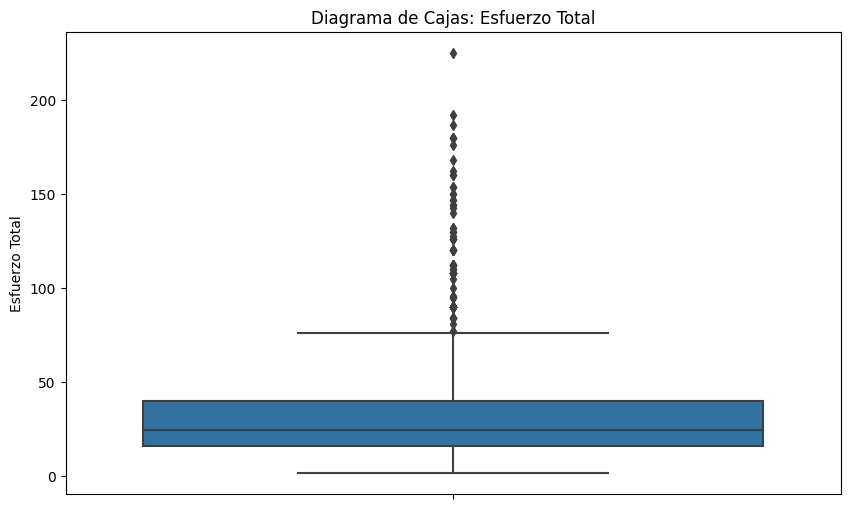

In [65]:
# Crear el diagrama de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ec, y='esfuerzo_total')

# Título del gráfico
plt.title('Diagrama de Cajas: Esfuerzo Total')

# Etiqueta del eje y
plt.ylabel('Esfuerzo Total')

# Mostrar el gráfico
plt.show()


Conclusiones Diagrama de Cajas y Bigotes de Esfuerzo total en Edx: Se observa que la mayoría de los cursos se ubican por debajo de los 50 h de esfuerzo total, siendo notable la presencia de outliers. 

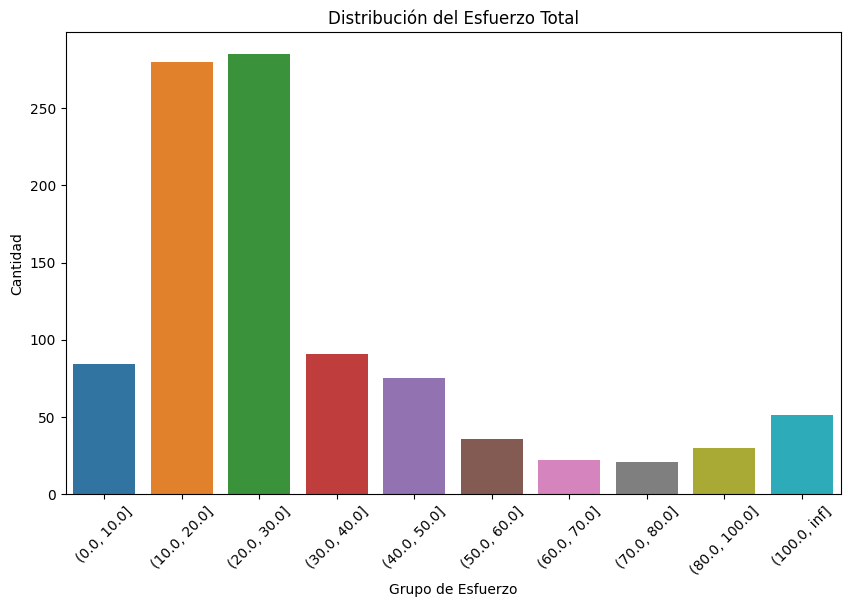

In [66]:
# Definir los límites de los grupos
bin_edges = [0, 10, 20, 30 ,40, 50,60,70,80,100,float('inf')]

# Crear las categorías a partir de los límites
categories = pd.cut(df_ec['esfuerzo_total'], bins=bin_edges)

# Agregar las categorías al DataFrame
df_ec['esfuerzo_group'] = categories

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ec, x='esfuerzo_group')

# Título del gráfico
plt.title('Distribución del Esfuerzo Total')

# Etiquetas de los ejes
plt.xlabel('Grupo de Esfuerzo')
plt.ylabel('Cantidad')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


Conclusiones Gráfica de Barras de Esfuerzo Total (horas de dedicación por semana por longitud del curso en semanas): Se observa una predominancia de cursos que requieren un esfuerzo de 10-20 y de 20-30 horas siendo predomintes en comparación al esfuerzo total de otros cursos. Esto puede servir de base para establecer una pauta de duración total de los cursos para la inversión.

c:\Users\el chico de rosas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


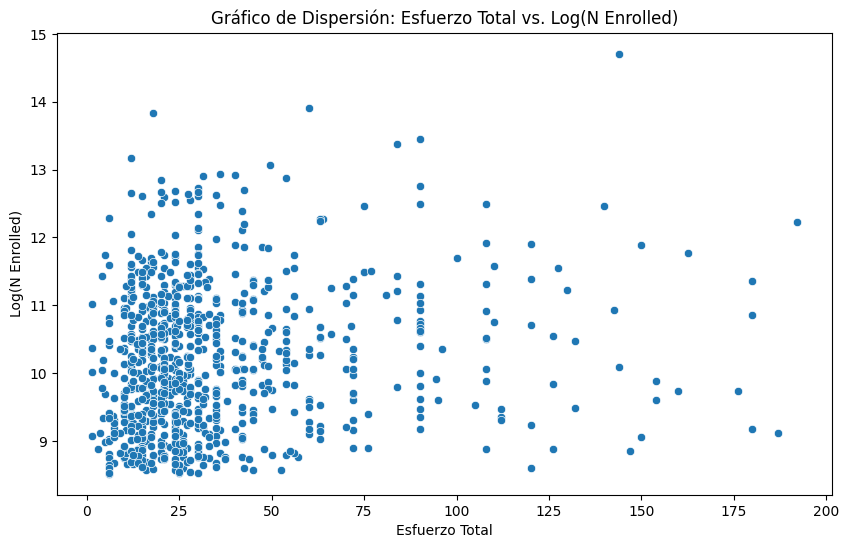

In [67]:
# Calcular el logaritmo de 'n_enrolled'
df_ec['log_n_enrolled'] = np.log(df_ec['n_enrolled'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ec, x='esfuerzo_total', y='log_n_enrolled')

# Título del gráfico
plt.title('Gráfico de Dispersión: Esfuerzo Total vs. Log(N Enrolled)')

# Etiquetas de los ejes
plt.xlabel('Esfuerzo Total')
plt.ylabel('Log(N Enrolled)')

# Mostrar el gráfico
plt.show()



Conclusiones Gráfica de Dispersión del Logaritmo de Número de Inscritos contra el Esfuerzo total: La presencia de la mayoría de los cursos está ubicado a valores bajos de Esfuerzo total. Lo cual es comprobable en el Gráfico Diagrama de Barras de Esfuerzo Total. 

c:\Users\el chico de rosas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


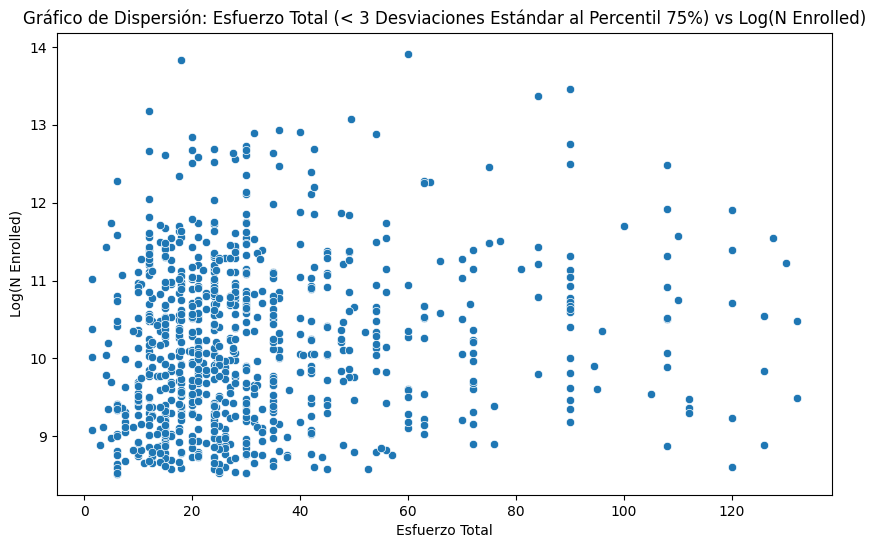

In [68]:
# Calcular el logaritmo de 'n_enrolled'
df_ec['log_n_enrolled'] = np.log(df_ec['n_enrolled'])

# Calcular la desviación estándar y el percentil 75% de 'esfuerzo_total'
std = df_ec['esfuerzo_total'].std()
percentile_75 = df_ec['esfuerzo_total'].quantile(0.75)

# Definir el límite superior del filtro
upper_limit = percentile_75 + 3 * std

# Filtrar los puntos con 'esfuerzo_total' por debajo del límite superior
filtered_data = df_ec[df_ec['esfuerzo_total'] < upper_limit]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='esfuerzo_total', y='log_n_enrolled')

# Título del gráfico
plt.title('Gráfico de Dispersión: Esfuerzo Total (< 3 Desviaciones Estándar al Percentil 75%) vs Log(N Enrolled)')

# Etiquetas de los ejes
plt.xlabel('Esfuerzo Total')
plt.ylabel('Log(N Enrolled)')

# Mostrar el gráfico
plt.show()




Conclusiones de Diagrama de Dispersión del Logaritmo del número de inscritos contra el esfuerzo total aplicando la regla de las 3 sigmas: Se percibe levemente una baja en la tasa de inscritos a mayor esfuerzo total, es decir. Los cursos más "ofertados" son aquellos con bajo esfuerzo total, sin embargo, es notable una curvatura con pendiente negativa a partir de una cima en el valor de esfuerzo total de 60 h, a partir de este valor, el comportamiento baja, lo que puede sugerir que a mayor esfuerzo total el número de inscritos no aumenta como sucedía previo al pico.

c:\Users\el chico de rosas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


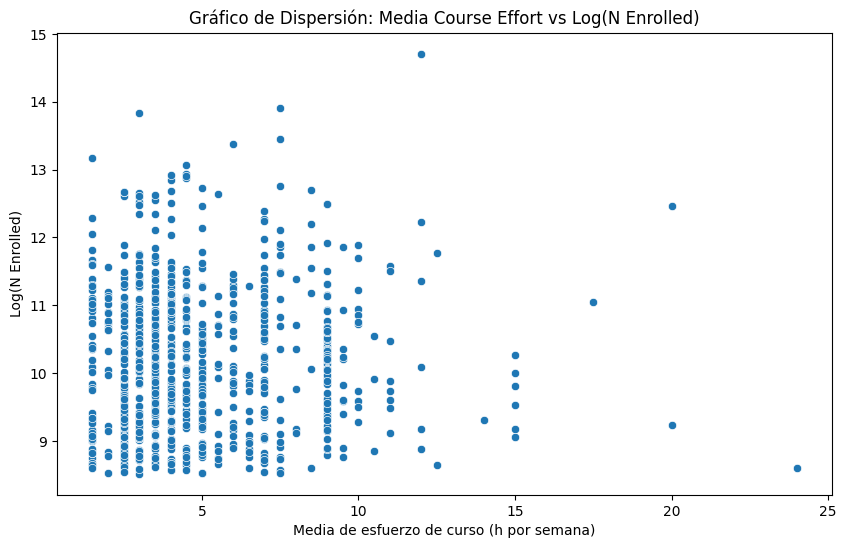

In [69]:
# Crear el gráfico de dispersión con logaritmo de 'n_enrolled'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ec, x='media_course_effort', y=np.log(df_ec['n_enrolled']))

# Título del gráfico
plt.title('Gráfico de Dispersión: Media Course Effort vs Log(N Enrolled)')

# Etiquetas de los ejes
plt.xlabel('Media de esfuerzo de curso (h por semana)')
plt.ylabel('Log(N Enrolled)')

# Mostrar el gráfico
plt.show()


Conclusión Gráfica de Dispersión del esfuerzo medio por curso contra el logartimo de número de suscritos: Se observa una clara tendencia a mayor esfuerzo en horas por semana, existe un menor número de personas suscritas a ellos. siendo notable la presencia de 0 a 5 con un crecimiento de suscritos (tendencia positiva)

In [70]:
df_ec

title  n_enrolled  \
0                                  How to Learn Online      124980   
1    Programming for Everybody (Getting Started wit...      293864   
2              CS50's Introduction to Computer Science     2442271   
3                                   The Analytics Edge      129555   
4    Marketing Analytics: Marketing Measurement Str...       81140   
..                                                 ...         ...   
970  Leaders in Citizen Security and Justice Manage...           0   
971              Pattern Studying and Making | 图案审美与创作           0   
972  Computational Neuroscience: Neuronal Dynamics ...       11246   
973  Cities and the Challenge of Sustainable Develo...        8775   
974                      MathTrackX: Special Functions           0   

                             course_type  \
0                Self-paced on your time   
1                Self-paced on your time   
2                Self-paced on your time   
3    Instructor-led on a course schedule   
4                Self-paced on your time   
..                                   ...   
970              Self-paced on your time   
971              Self-paced on your time   
972              Self-paced on your time   
973              Self-paced on your time   
974              Self-paced on your time   

                                  institution         Level  \
0                                         edX  Introductory   
1                  The University of Michigan  Introductory   
2                          Harvard University  Introductory   
3       Massachusetts Institute of Technology  Intermediate   
4          University of California, Berkeley  Introductory   
..                                        ...           ...   
970           Inter-American Development Bank  Intermediate   
971                       Tsinghua University  Introductory   
972  École polytechnique fédérale de Lausanne      Advanced   
973                               SDG Academy  Introductory   
974                    University of Adelaide  Introductory   

                          subject language    subtitles         course_effort  \
0    Education & Teacher Training  English      English    2–3 hours per week   
1                Computer Science  English      English    2–4 hours per week   
2                Computer Science  English      English   6–18 hours per week   
3      Data Analysis & Statistics  English      English  10–15 hours per week   
4                Computer Science  English      English    5–7 hours per week   
..                            ...      ...          ...                   ...   
970               Social Sciences  English      English    4–5 hours per week   
971                 Art & Culture       中文  English, 中文    3–5 hours per week   
972       Biology & Life Sciences  English      English    4–6 hours per week   
973         Environmental Studies  English      English    1–2 hours per week   
974                          Math  English      English    3–6 hours per week   

    course_length                                         price  \
0         2 Weeks   FREE-Add a Verified Certificate for $49 USD   
1         7 Weeks   FREE-Add a Verified Certificate for $49 USD   
2        12 Weeks   FREE-Add a Verified Certificate for $90 USD   
3        13 Weeks  FREE-Add a Verified Certificate for $199 USD   
4         4 Weeks  FREE-Add a Verified Certificate for $249 USD   
..            ...                                           ...   
970      10 Weeks   FREE-Add a Verified Certificate for $25 USD   
971      12 Weeks  FREE-Add a Verified Certificate for $139 USD   
972       6 Weeks  FREE-Add a Verified Certificate for $139 USD   
973       1 Weeks   FREE-Add a Verified Certificate for $25 USD   
974       4 Weeks   FREE-Add a Verified Certificate for $79 USD   

     media_course_effort  price_extracted  length_extracted  \
0                    2.5               49                 2   
1                 

In [71]:
df_ec['esfuerzo_group_str'] = df_ec['esfuerzo_group'].astype(str)


order=['(0.0,10.0]','(10.0,20.0]','(20.0,30.0]','(30.0,40.0]','(40.0,50.0]','(50.0,60.0]','(60.0,70.0]','(70.0,80.0]','(80.0,100.0]','(100.0,inf)']

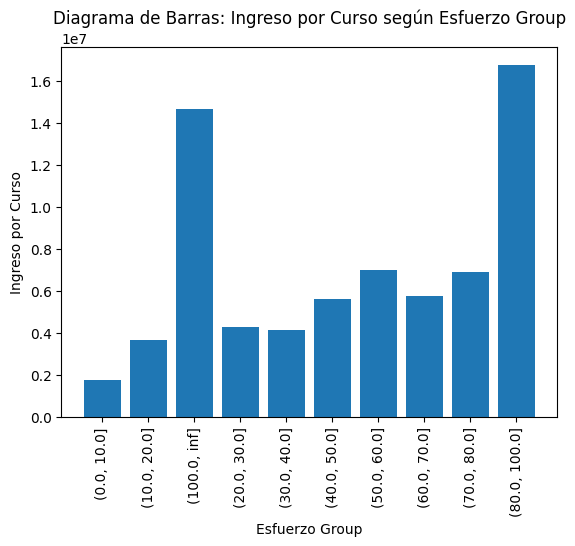

In [72]:

# Agrupar los datos por 'esfuerzo_group' y calcular el promedio de 'ingreso_por_curso'
grupo_ingreso = df_ec.groupby('esfuerzo_group_str')['ingreso_por_curso'].mean()

# Crear el gráfico de barras
plt.bar(grupo_ingreso.index, grupo_ingreso.values)

# Etiquetas y título del gráfico
plt.xlabel('Esfuerzo Group')
plt.ylabel('Ingreso por Curso')
plt.title('Diagrama de Barras: Ingreso por Curso según Esfuerzo Group')

# Rotar las etiquetas del eje x a 90 grados
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


Conclusiones Gráfica de Barras de Esfuerzo Total de Curso contra Ingreso por Curso: Se observa un patron predominante en cursos con tiempo de esfuerzo de 80 a 100 horas. Lo que podría confimrar que aquellos cursos extensos son de mayor remuneración económica para la empresa.

In [73]:
grupo_ingreso = df_ec.groupby('esfuerzo_group_str')['ingreso_por_curso'].mean()
grupo_ingreso = grupo_ingreso.sort_values().reset_index()

# Renombrar la columna de los índices
grupo_ingreso = grupo_ingreso.rename(columns={'esfuerzo_group_str': 'esfuerzo_total_group'})

grupo_ingreso.iloc[[2, 3]] = grupo_ingreso.iloc[[3, 2]]
grupo_ingreso.iloc[[5, 7]] = grupo_ingreso.iloc[[7, 5]]
grupo_ingreso.iloc[[6, 7]] = grupo_ingreso.iloc[[7, 6]]
grupo_ingreso.iloc[[8, 9]] = grupo_ingreso.iloc[[9, 8]]
grupo_ingreso.head(10)

esfuerzo_total_group  ingreso_por_curso
0          (0.0, 10.0]     1764347.988095
1         (10.0, 20.0]     3650586.589286
2         (20.0, 30.0]     4291219.982456
3         (30.0, 40.0]     4146002.571429
4         (40.0, 50.0]     5630902.586667
5         (50.0, 60.0]     7008621.305556
6         (60.0, 70.0]     5775828.545455
7         (70.0, 80.0]     6881892.714286
8        (80.0, 100.0]    16774644.166667
9         (100.0, inf]    14644335.294118

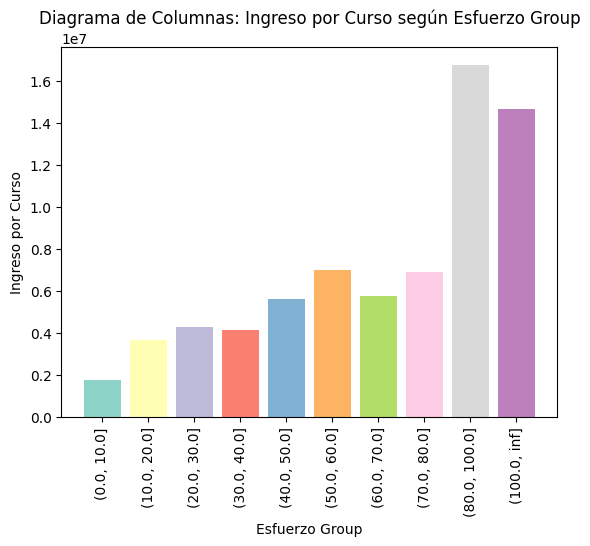

In [74]:
grupo_ingreso = df_ec.groupby('esfuerzo_group_str')['ingreso_por_curso'].mean()
grupo_ingreso = grupo_ingreso.sort_values().reset_index()

# Renombrar la columna de los índices
grupo_ingreso = grupo_ingreso.rename(columns={'esfuerzo_total_group': 'esfuerzo_total_group'})

grupo_ingreso.iloc[[2, 3]] = grupo_ingreso.iloc[[3, 2]]
grupo_ingreso.iloc[[5, 7]] = grupo_ingreso.iloc[[7, 5]]
grupo_ingreso.iloc[[6, 7]] = grupo_ingreso.iloc[[7, 6]]
grupo_ingreso.iloc[[8, 9]] = grupo_ingreso.iloc[[9, 8]]

colores = sns.color_palette('Set3', len(grupo_ingreso))

plt.bar(grupo_ingreso['esfuerzo_group_str'], grupo_ingreso['ingreso_por_curso'],color=colores)


# Etiquetas y título del gráfico
plt.xlabel('Esfuerzo Group')
plt.ylabel('Ingreso por Curso')
plt.title('Diagrama de Columnas: Ingreso por Curso según Esfuerzo Group')

# Rotar las etiquetas del eje x a 90 grados
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()



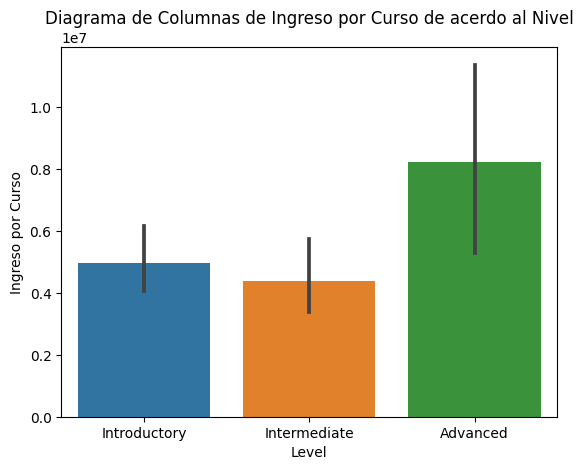

In [75]:
# Crear la gráfica de barras
sns.barplot(data=df_ec, x='Level', y='ingreso_por_curso')

# Configurar los ejes y el título
plt.xlabel('Level')
plt.ylabel('Ingreso por Curso')
plt.title('Diagrama de Columnas de Ingreso por Curso de acerdo al Nivel')

# Mostrar la gráfica
plt.show()

### Udemy

In [76]:
df_uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   course_id        3678 non-null   int64 
 1   course_title     3678 non-null   object
 2   is_paid          3678 non-null   bool  
 3   price            3678 non-null   int64 
 4   num_subscribers  3678 non-null   int64 
 5   num_reviews      3678 non-null   int64 
 6   num_lectures     3678 non-null   int64 
 7   level            3678 non-null   object
 8   subject          3678 non-null   object
dtypes: bool(1), int64(5), object(3)
memory usage: 233.6+ KB


In [77]:
df_uc.head()

course_id                                       course_title  is_paid  \
0    1070968                 Ultimate Investment Banking Course     True   
1    1113822  Complete GST Course & Certification - Grow You...     True   
2    1006314  Financial Modeling for Business Analysts and C...     True   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...     True   
4    1011058       How To Maximize Your Profits Trading Options     True   

   price  num_subscribers  num_reviews  num_lectures               level  \
0    200             2147           23            51          All Levels   
1     75             2792          923           274          All Levels   
2     45             2174           74            51  Intermediate Level   
3     95             2451           11            36          All Levels   
4    200             1276           45            26  Intermediate Level   

            subject  
0  Business Finance  
1  Business Finance  
2  Business Finance  
3  Business Finance  
4  Business Finance

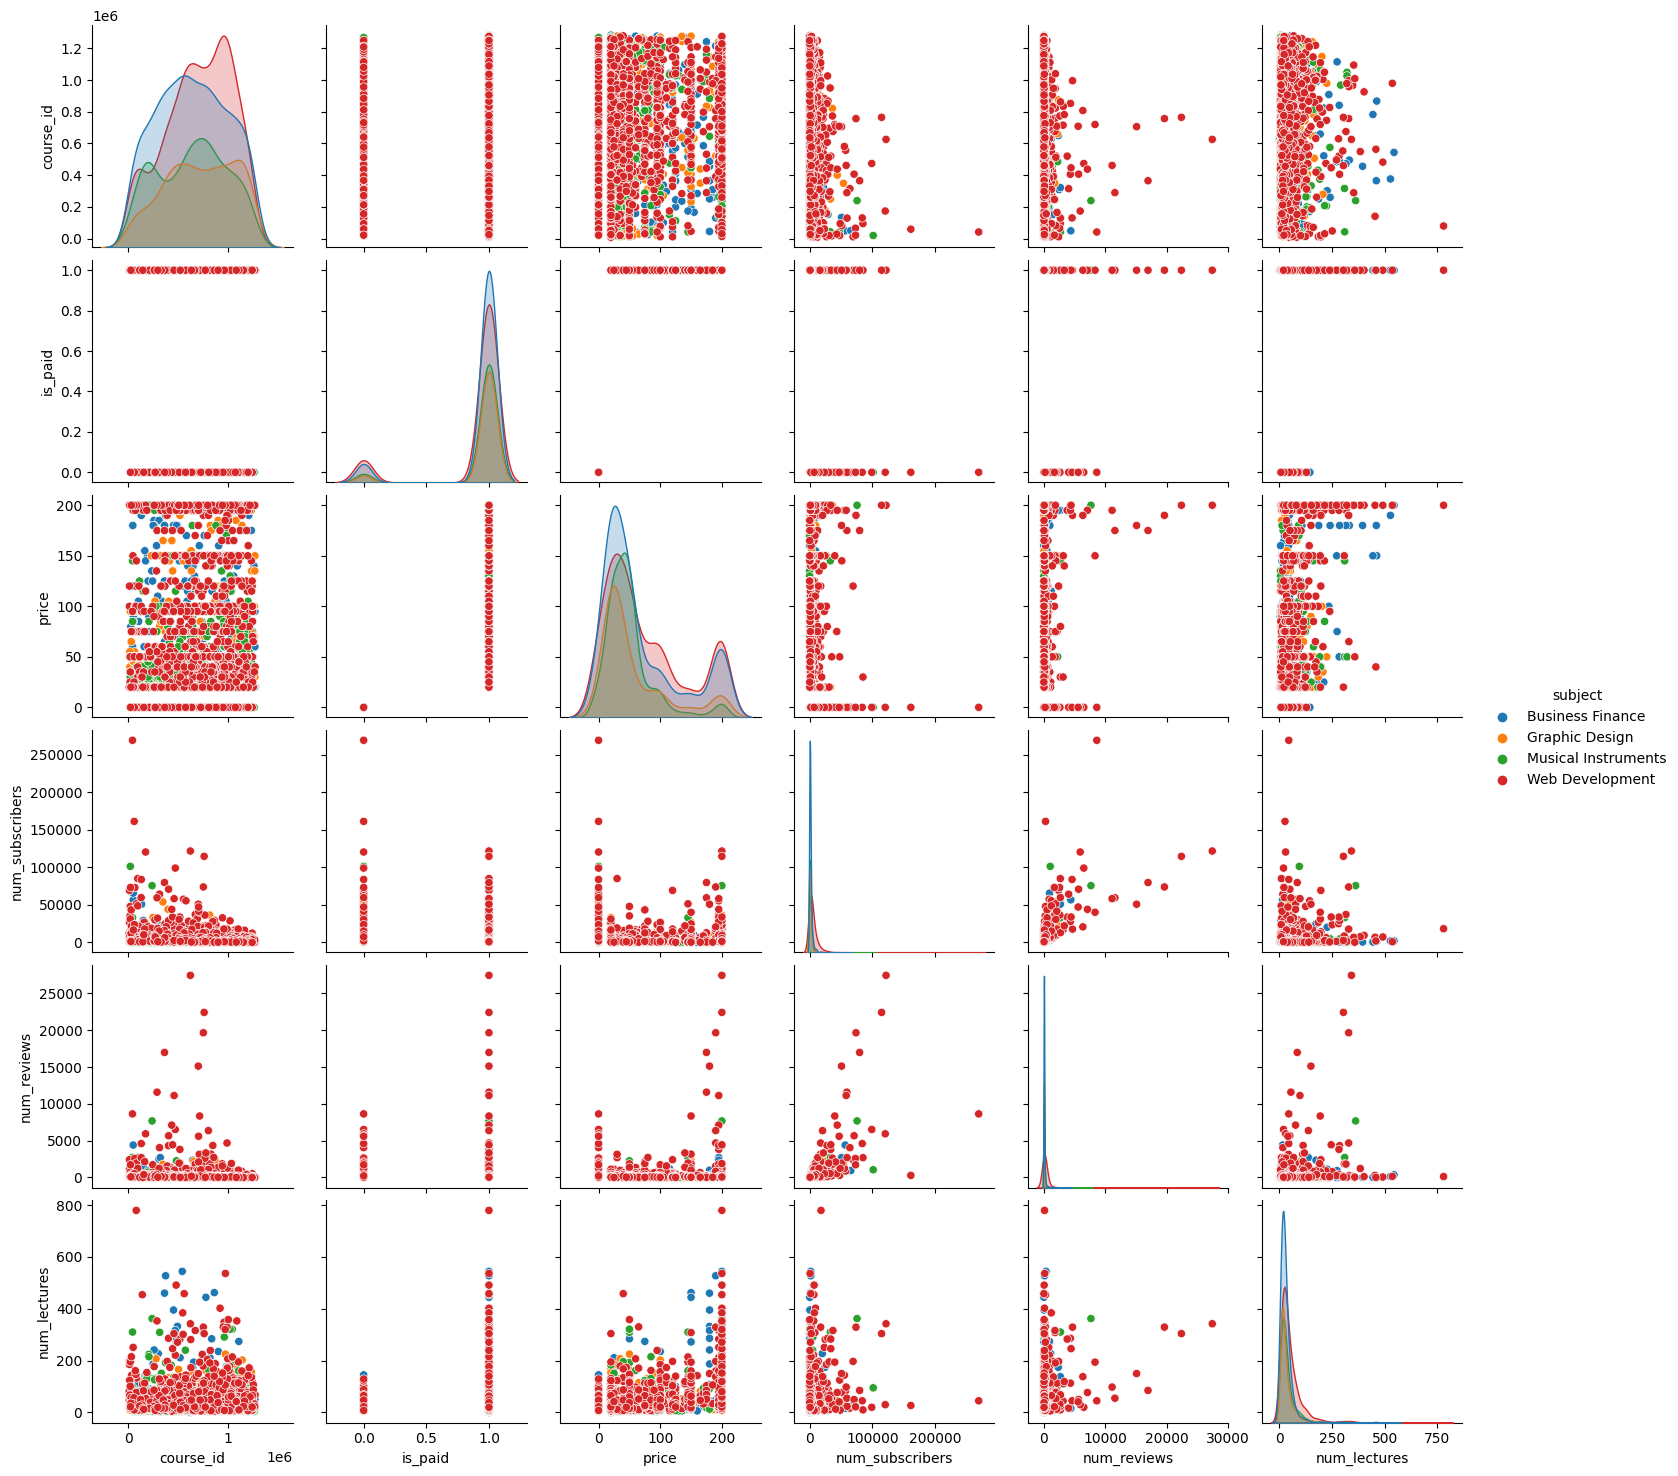

In [78]:
sns.pairplot(data=df_uc,hue='subject')

Se observa demasiada presencia de Web Development, por esa razón se filtrará los datos sin tomar en cuenta ese subject

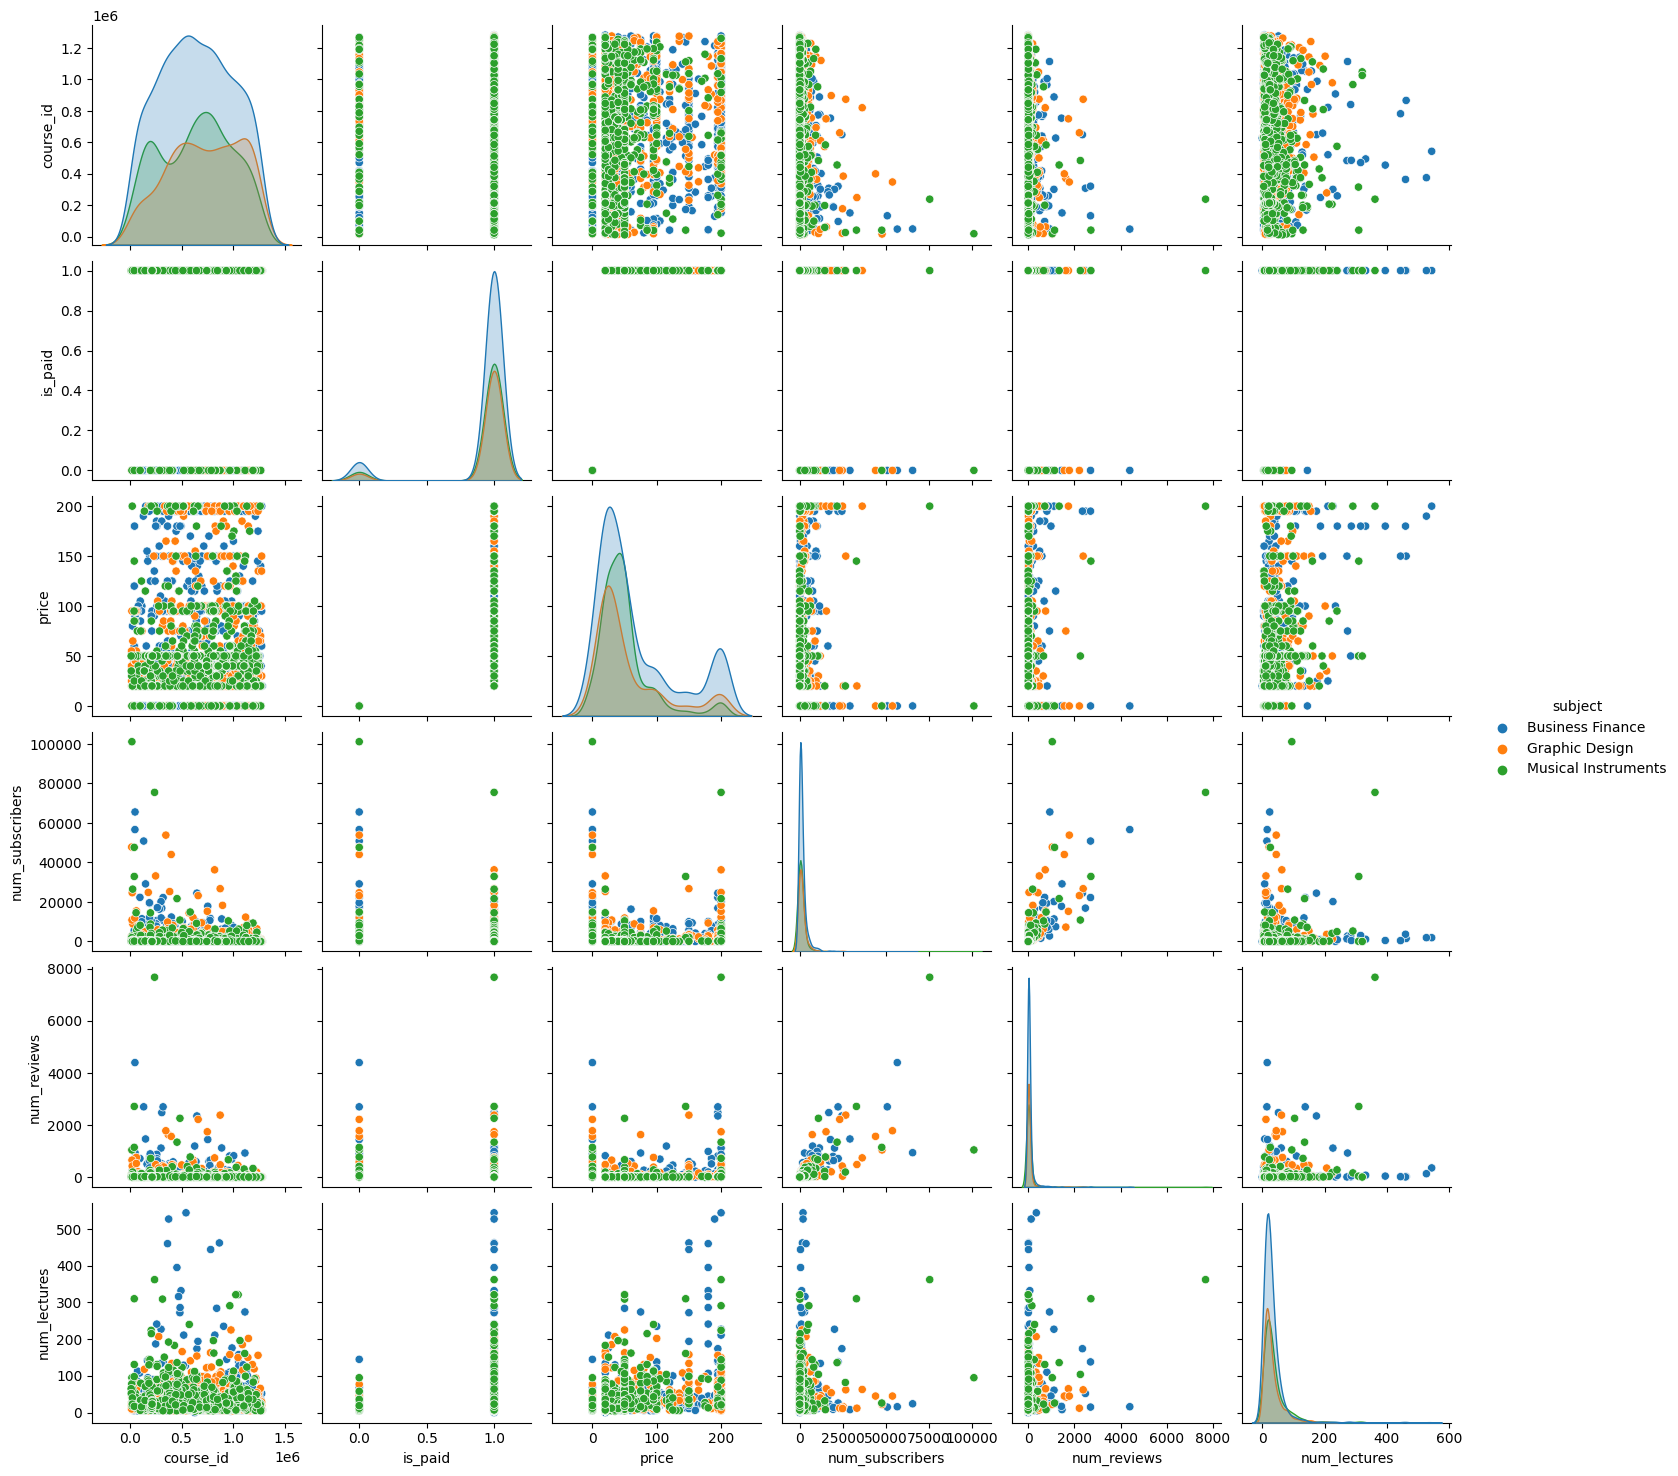

In [79]:
# Filtrar los datos para excluir la categoría 'web development'
filtered_data = df_uc[df_uc['subject'] != 'Web Development']

# Crear el pairplot sin la categoría 'web development'
sns.pairplot(data=filtered_data, hue='subject')

# Mostrar el gráfico
plt.show()


Multiplicaré los valores de price por número de suscriptores al cursos para obtener una nueva variable que sea 'ingreso_de_curso' para poder evaluarla ante otras variables como idioma y nivel

In [80]:
df_uc['ingreso_por_curso'] = df_uc['price'] * df_uc['num_subscribers']


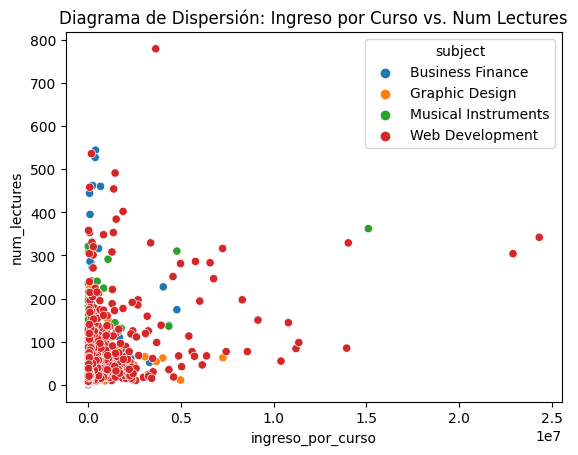

In [81]:
# Crear el diagrama de dispersión con subdivisión por 'subject'
sns.scatterplot(data=df_uc, x='ingreso_por_curso', y='num_lectures', hue='subject')

# Título del gráfico
plt.title('Diagrama de Dispersión: Ingreso por Curso vs. Num Lectures')

# Mostrar el gráfico
plt.show()


Conclusiones de Diagrama de Dispersión entre Ingreso por curso y Número de Lecturas en Udemy: La mayoría de los cursos de Web Development generan poco ingreso (número de suscriptores multiplicado por precio de curso), sin embargo, debido a la gran cantidad de ellos parece ser que ante una gran oferta de ellos, se puede concluir que el mayor aporte monetario a Udemy viene de este subject. Por otro lado, existen cursos que generan mayor ingreso que en su mayoría son del mismo tema, tal vez, a raíz de la gran diversidad de cursos enfocados en esta área. 

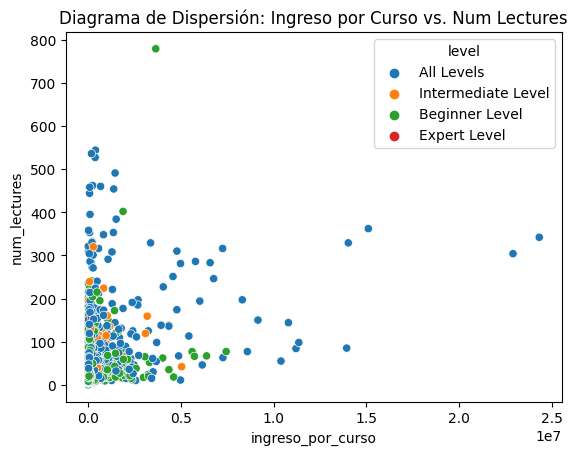

In [82]:
# Crear el diagrama de dispersión con subdivisión por 'subject'
sns.scatterplot(data=df_uc, x='ingreso_por_curso', y='num_lectures', hue='level')

# Título del gráfico
plt.title('Diagrama de Dispersión: Ingreso por Curso vs. Num Lectures')

# Mostrar el gráfico
plt.show()

Conclusiones de Diagrama de Dispersión de Ingreso por curso contra Número de lectures subidivido por Temática eliminando Web Development: Se comprueba la misma tendencia que con Web Development, una gran cantidad de cursos con pocas lecturas que a pesar de diferencias sustanciales en el número de lecturas generan un ingreso similar. Es importante considerar la escala presente en el eje X, por su magnitud podría contarse que un movimiento de 0.25 a 0.5 representa (tomando en cuenta un contexto de pequeña empresa) una ganancia tal vez, significativa. 

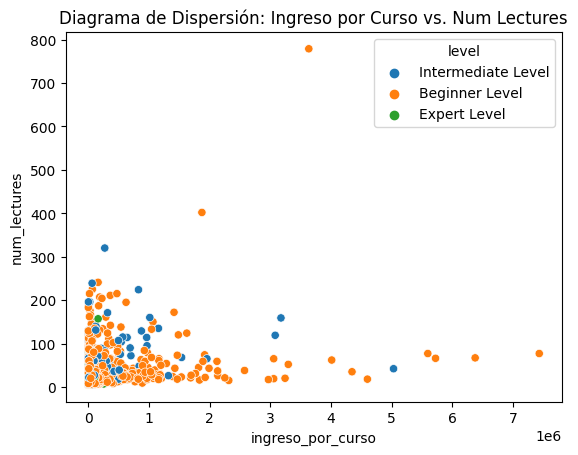

In [83]:
# Filtrar los datos para excluir la categoría 'All Levels'
filtered_data = df_uc[df_uc['level'] != 'All Levels']

# Crear el diagrama de dispersión sin la categoría 'All Levels'
sns.scatterplot(data=filtered_data, x='ingreso_por_curso', y='num_lectures', hue='level')

# Título del gráfico
plt.title('Diagrama de Dispersión: Ingreso por Curso vs. Num Lectures')

# Mostrar el gráfico
plt.show()

Conclusiones Diagrama de Dispersión Ingreso por Curso y Número de Conferencias dividido por nivel: se observa que la gran mayoría de cursos pertenecen al área de All Levels, sin embargo en el gráfico donde se discrimina tal valor, se observa que los cursos de nivel Beginner predominan en la cantidad de ingreso por curso generado, se observa una tendencia donde aquellos cursos con mayor éxito económico (traducido como Ingreso por curso) son de nivel Beginner y con una cantidad de conferencias bajas. 

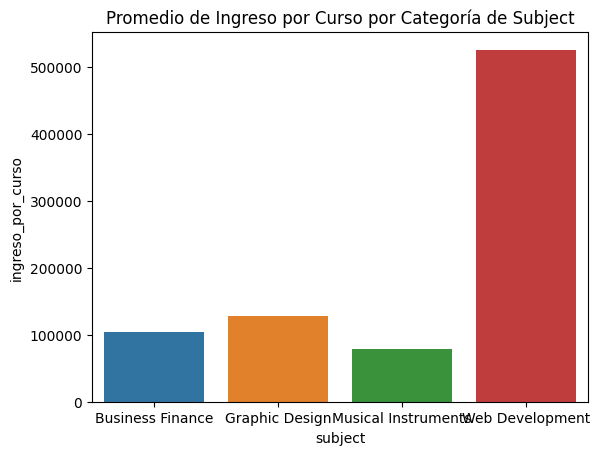

In [84]:
# Calcular el promedio de ingreso por curso por cada categoría de 'subject'
avg_income_by_subject = df_uc.groupby('subject')['ingreso_por_curso'].mean().reset_index()

# Crear el diagrama de barras
sns.barplot(data=avg_income_by_subject, x='subject', y='ingreso_por_curso')

# Título del gráfico
plt.title('Promedio de Ingreso por Curso por Categoría de Subject')

# Mostrar el gráfico
plt.show()


Conclusiones del Gráfico de Columnas de Promedio de Ingreso por Curso y Subject: Se observa que los cursos enfocados en Web Development generan un mayor ingreso promedio, muy por encima de los otros subject, siguiendo por debajo Graphic Design a pesar de que Business Finance es el segundo con mayor presencia en Udemy. 

In [85]:
df_uc.head()

course_id                                       course_title  is_paid  \
0    1070968                 Ultimate Investment Banking Course     True   
1    1113822  Complete GST Course & Certification - Grow You...     True   
2    1006314  Financial Modeling for Business Analysts and C...     True   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...     True   
4    1011058       How To Maximize Your Profits Trading Options     True   

   price  num_subscribers  num_reviews  num_lectures               level  \
0    200             2147           23            51          All Levels   
1     75             2792          923           274          All Levels   
2     45             2174           74            51  Intermediate Level   
3     95             2451           11            36          All Levels   
4    200             1276           45            26  Intermediate Level   

            subject  ingreso_por_curso  
0  Business Finance             429400  
1  Business Finance             209400  
2  Business Finance              97830  
3  Business Finance             232845  
4  Business Finance             255200

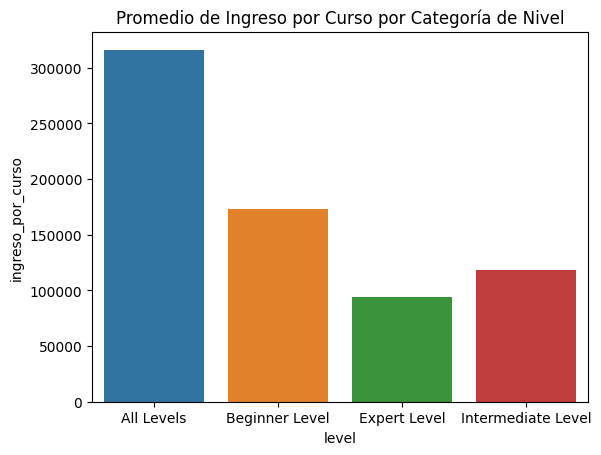

In [86]:
# Calcular el promedio de ingreso por curso por cada categoría de 'subject'
avg_income_by_level = df_uc.groupby('level')['ingreso_por_curso'].mean().reset_index()

# Crear el diagrama de barras
sns.barplot(data=avg_income_by_level, x='level', y='ingreso_por_curso')

# Título del gráfico
plt.title('Promedio de Ingreso por Curso por Categoría de Nivel')

# Mostrar el gráfico
plt.show()


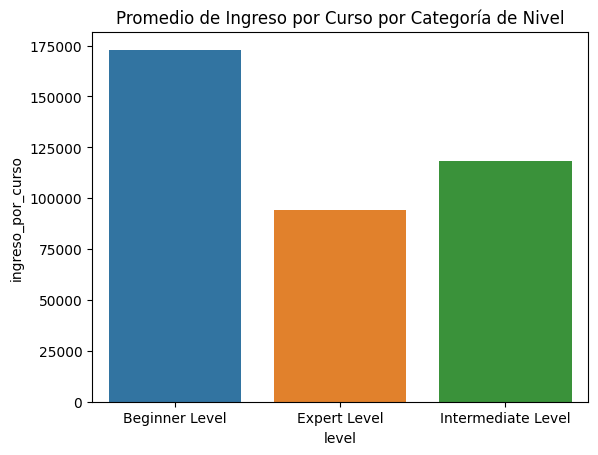

In [87]:
# Filtrar las filas con nivel diferente a 'All Levels'
filtered_df_uc = df_uc[df_uc['level'] != 'All Levels']

# Calcular el promedio de ingreso por curso por cada categoría de 'subject'
avg_income_by_level = filtered_df_uc.groupby('level')['ingreso_por_curso'].mean().reset_index()

# Crear el diagrama de barras
sns.barplot(data=avg_income_by_level, x='level', y='ingreso_por_curso')

# Título del gráfico
plt.title('Promedio de Ingreso por Curso por Categoría de Nivel')

# Mostrar el gráfico
plt.show()


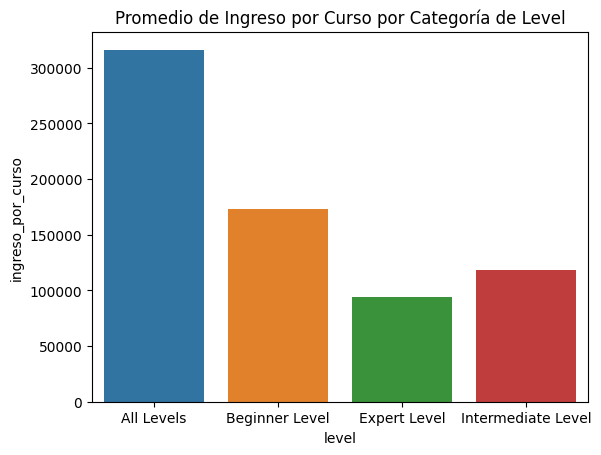

In [88]:
# Calcular el promedio de ingreso por curso por cada categoría de 'subject'
avg_income_by_subject = df_uc.groupby('level')['ingreso_por_curso'].mean().reset_index()

# Crear el diagrama de barras
sns.barplot(data=avg_income_by_subject, x='level', y='ingreso_por_curso')

# Título del gráfico
plt.title('Promedio de Ingreso por Curso por Categoría de Level')

# Mostrar el gráfico
plt.show()


Conclusiones de gráfico de Promedio de Ingreso por Curso dividido por categoría de Level: Se observa un ingreso promedio mayor por cursos de All Levels seguido de Beginner Level y posteriormente Intermediate Level, concordante con la tasa de frecuencia de los cursos.

### Coursera

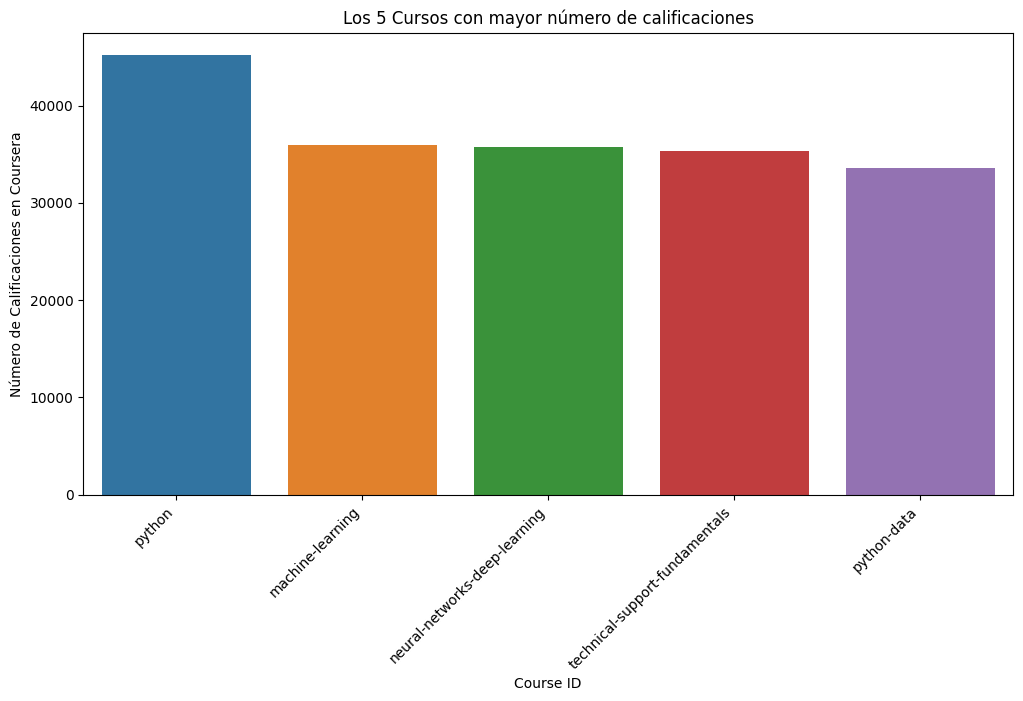

In [89]:
# Realizar el merge entre df_cr y df_cc
merged_df = df_cr.merge(df_cc, on='course_id')

# Contar el número de ocurrencias de cada course_id
course_counts = merged_df['course_id'].value_counts()

# Seleccionar los 10 cursos con el mayor número de ocurrencias
top_5_courses = course_counts.head(5)

# Crear el gráfico de barras con las barras acostadas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_courses.index, y=top_5_courses.values)

# Título del gráfico
plt.title('Los 5 Cursos con mayor número de calificaciones')

# Etiquetas del eje x
plt.xlabel('Course ID')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas en diagonal

# Etiquetas del eje y
plt.ylabel('Número de Calificaciones en Coursera')

# Mostrar el gráfico
plt.show()


Conclusiones Diagrama de Columnas de Los cursos con mayor número de calificaciones de Coursera: Se observa la presencia predominante de tópicos enfocados en TI como python, python-data, machine-learning y deep learning. Con base en lo anterior, ante la falta de una variable subscriptores en Coursera y entendiendose como aquellas personas que calificaron el curso sean únicamente consumidores del producto, podemos aseverar que los cursos TI en Coursera tienen una mayor demanda en comparación a otros tópicos. 

In [90]:
# Obtener el recuento de ratings para cada course_id en df_cr
ratings_count = df_cr['course_id'].value_counts()

# Agregar una nueva columna "num_ratings" en df_cc con el recuento de ratings correspondiente
df_cc['num_ratings'] = df_cc['course_id'].map(ratings_count)

# Mostrar el DataFrame actualizado
df_cc.head()

#

name  \
0                                   Machine Learning   
1                                  Indigenous Canada   
2                          The Science of Well-Being   
3                     Technical Support Fundamentals   
4  Become a CBRS Certified Professional Installer...   

                 institution                       course_id  media_rating  \
0        Stanford University                machine-learning      4.750522   
1      University of Alberta               indigenous-canada      4.813614   
2            Yale University       the-science-of-well-being      4.928404   
3                     Google  technical-support-fundamentals      4.776183   
4  Google - Spectrum Sharing        google-cbrs-cpi-training      4.931034   

   num_ratings  
0      35895.0  
1       3702.0  
2      20085.0  
3      35319.0  
4         87.0

In [91]:
df_cc['num_ratings'].describe()

count      604.000000
mean      2408.461921
std       4599.422887
min          3.000000
25%        374.250000
50%       1071.500000
75%       2408.250000
max      45218.000000
Name: num_ratings, dtype: float64

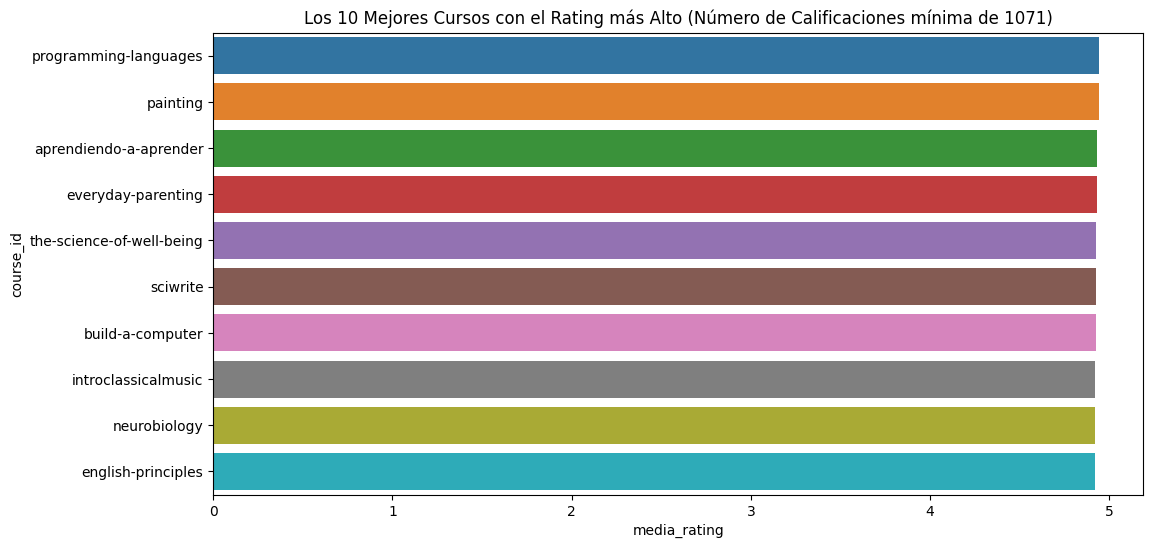

In [92]:
# Filtrar los cursos con 'num_ratings' mayor a 1071
filtered_courses = df_cc[df_cc['num_ratings'] > 1071]

# Ordenar los cursos filtrados por 'media_rating' de manera descendente
top_10_courses = filtered_courses.nlargest(10, 'media_rating')

# Crear el gráfico de columnas
plt.figure(figsize=(12, 6))
sns.barplot(x='media_rating', y='course_id', data=top_10_courses)

# Título del gráfico
plt.title('Los 10 Mejores Cursos con el Rating más Alto (Número de Calificaciones mínima de 1071)')

# Mostrar el gráfico
plt.show()

Conclusiones Diagrama de Barras de los cursos con mayor rating que tienen al menos 1071 número de calificaciones: Se observa una predominancia de 2 áreas TI observable con el tópico build-a-computer y programming-language, al igual que otros cursos enfocados en humanides como painting, educación, introclassicmusic. NOTA: La condición fue establecida para poder filtrar aquellos que tuvieran un mínimo de 1071 calificaciones, este número representa la mediana del número de calificaciones. 

Para concluir, elaboraré el gráfico de ventas, para ello evaluarémos la información en torno a ventas que tenemos disponibles

### Filtro Rating


In [93]:
df_cc.head()

name  \
0                                   Machine Learning   
1                                  Indigenous Canada   
2                          The Science of Well-Being   
3                     Technical Support Fundamentals   
4  Become a CBRS Certified Professional Installer...   

                 institution                       course_id  media_rating  \
0        Stanford University                machine-learning      4.750522   
1      University of Alberta               indigenous-canada      4.813614   
2            Yale University       the-science-of-well-being      4.928404   
3                     Google  technical-support-fundamentals      4.776183   
4  Google - Spectrum Sharing        google-cbrs-cpi-training      4.931034   

   num_ratings  
0      35895.0  
1       3702.0  
2      20085.0  
3      35319.0  
4         87.0

In [94]:
# Filtrar los cursos con 'media_rating' más alta y 'num_rating' mayor a 1071
cursos_filtrados = df_cc[(df_cc['num_ratings'] > 1071)]

# Ordenar los cursos por 'num_rating' de forma descendente
cursos_filtrados = cursos_filtrados.sort_values('media_rating', ascending=False)

In [95]:
cursos_filtrados.head()

name  \
457                      Programming Languages, Part A   
342           In the Studio: Postwar Abstract Painting   
434  Aprendiendo a aprender: Poderosas herramientas...   
135      Everyday Parenting: The ABCs of Child Rearing   
2                            The Science of Well-Being   

                            institution                  course_id  \
457            University of Washington      programming-languages   
342            The Museum of Modern Art                   painting   
434  University of California San Diego     aprendiendo-a-aprender   
135                     Yale University         everyday-parenting   
2                       Yale University  the-science-of-well-being   

     media_rating  num_ratings  
457      4.941765       1099.0  
342      4.940767       1148.0  
434      4.932334       8202.0  
135      4.928571       1344.0  
2        4.928404      20085.0

In [96]:
top_cursos[]

SyntaxError: invalid syntax (3195126322.py, line 1)

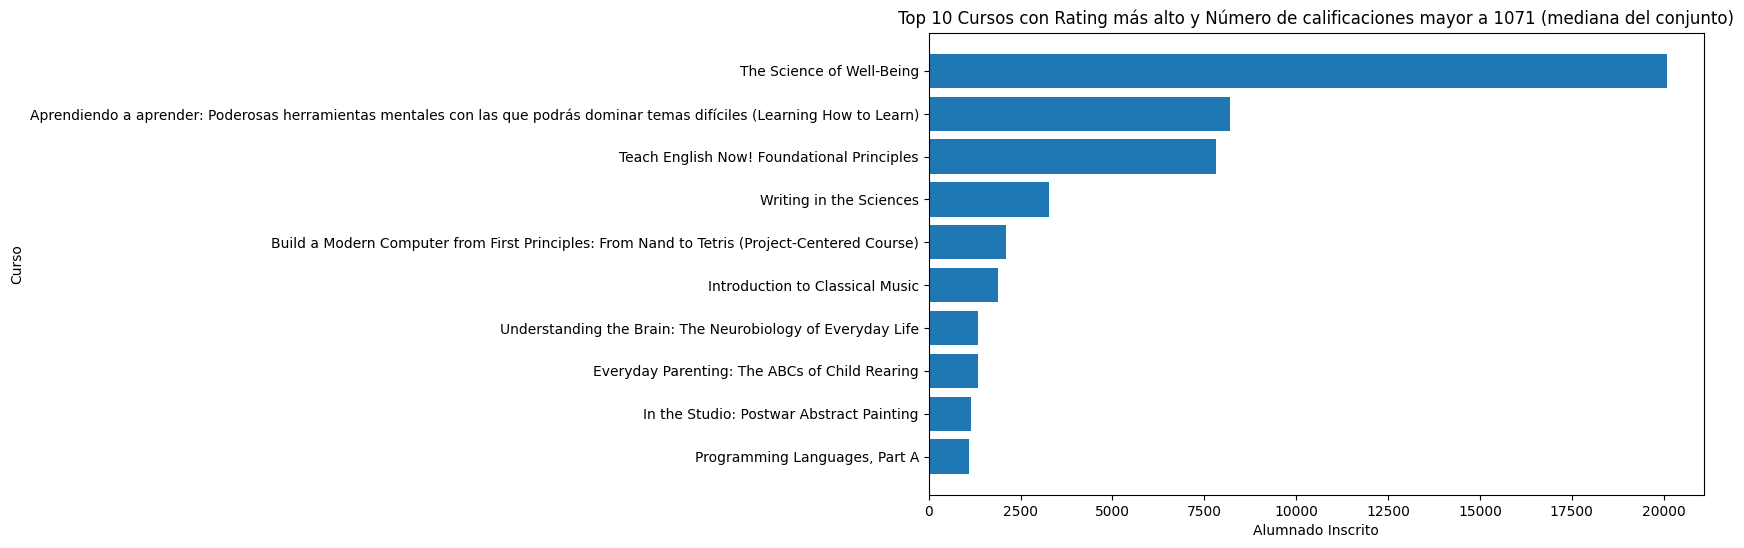

In [ ]:
top_cursos = cursos_filtrados.head(10)
top_cursos = top_cursos.sort_values('num_ratings', ascending=True)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_cursos['name'], top_cursos['num_ratings'])

# Etiquetas y título del gráfico
plt.xlabel('Alumnado Inscrito')
plt.ylabel('Curso')
plt.title('Top 10 Cursos con Rating más alto y Número de calificaciones mayor a 1071 (mediana del conjunto)')

# Mostrar el gráfico
plt.show()


Conclusión de Cursos con mayor calificación: Se observa que los cursos tienen una diversidad de temáticas, algunas se enfocan en ciencias biológicas como la neurobiología, otras en estudios de pinturas enfocadas a épocas postguerra y alguna a lenguajes de programación. La información concluyente del gráfico afirma que existe una gran atracción hacia cursos enfocadas en humanidades en la plataforma de Coursera siendo calificado bastante alto y teniendo una gran cantidad de alumnado más del doble con el segundo lugar. 

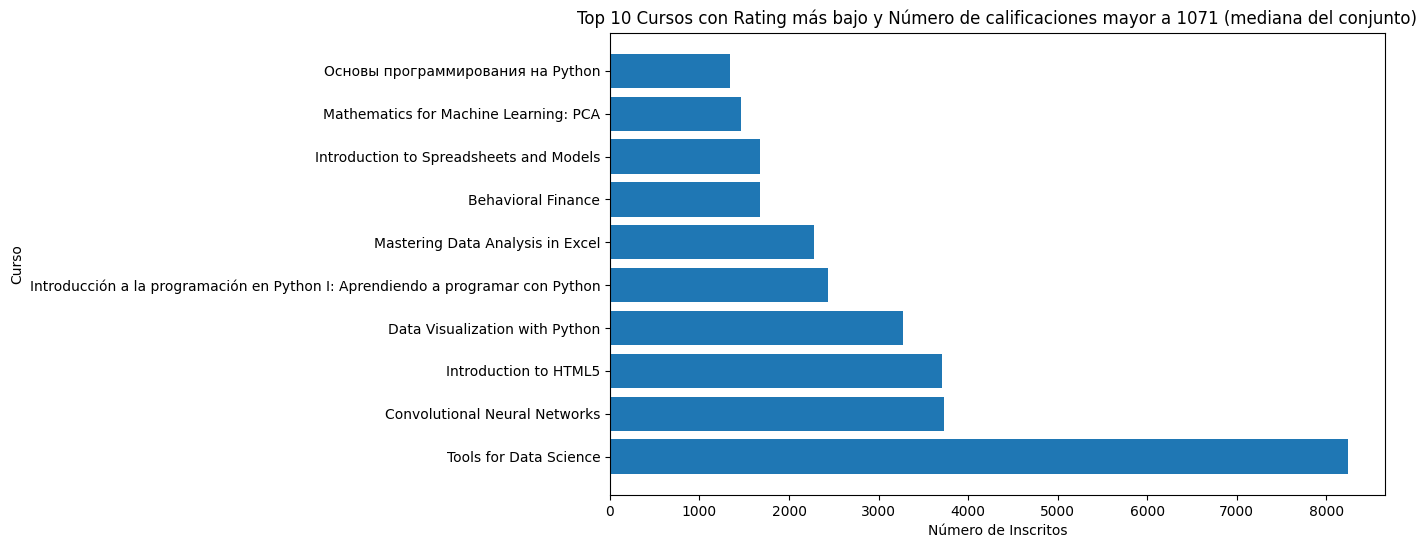

In [ ]:
top_cursos = cursos_filtrados.tail(10)
top_cursos = top_cursos.sort_values('num_ratings', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_cursos['name'], top_cursos['num_ratings'])

# Etiquetas y título del gráfico
plt.xlabel('Número de Inscritos')
plt.ylabel('Curso')
plt.title('Top 10 Cursos con Rating más bajo y Número de calificaciones mayor a 1071 (mediana del conjunto)')

# Mostrar el gráfico
plt.show()

Conclusiones de Cursos con menor rating: Es notable la presencia de un curso con un nombre que utiliza carácteres disitntos al español e inglés llamando la atención por ser un curso que tiene más de 1071 revisiones pero que tiene un rating que lo ubica entre los peores 10 cursos de Coursera, también es notable la presencia de cursos enfocados en tecnologías, por la presencia de Data Visualization with Python, Convolutional Neural Networks, Tools for Data Science, entre otros, para este último a pesar de ubicarse entre los cursos con menor calificación de Coursera, la cantidad de inscritos es bastante alta de 8000, ignorando este caso aíslado, la información indica que los cursos que obtienen una menor calificación tienen pocos inscritos en comparación a aquellos que tienen una calificación más alta, visible de forma sencilla por la escala presente en los ejes x de los gráficos. 

In [ ]:
# Obtener los colores predeterminados
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Imprimir los colores predeterminados
print(default_colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


### Filtro Idioma

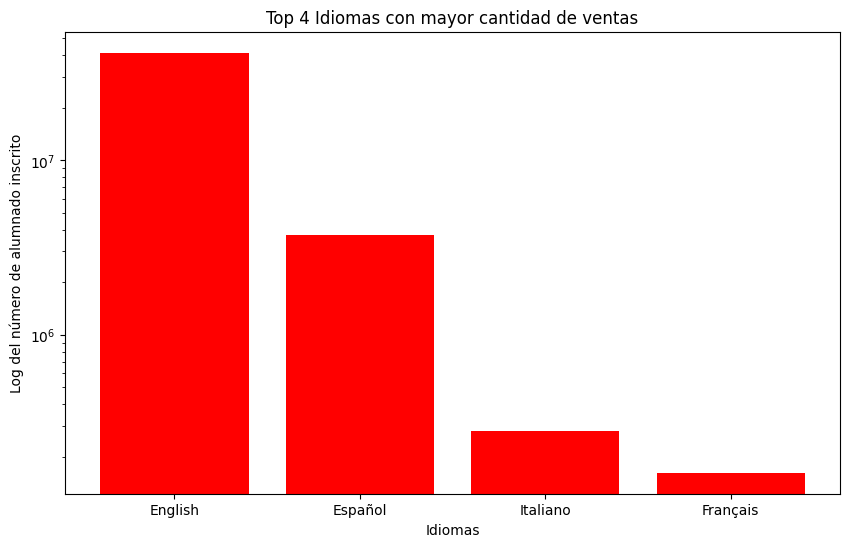

In [ ]:
# Agrupar los datos por 'language' y calcular la suma de 'n_enrolled'
grouped_data = df_ec.groupby('language')['n_enrolled'].sum().reset_index()

# Ordenar los datos por 'n_enrolled' de forma descendente
grouped_data = grouped_data.sort_values('n_enrolled', ascending=False)

# Seleccionar los primeros 4 idiomas
top_languages = grouped_data.head(4)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_languages['language'], top_languages['n_enrolled'],color='red')

# Etiquetas y título del gráfico
plt.xlabel('Idiomas')
plt.ylabel('Log del número de alumnado inscrito')
plt.title('Top 4 Idiomas con mayor cantidad de ventas en Edx')

# Escala logarítmica en el eje y
plt.yscale('log')

# Mostrar el gráfico
plt.show()


Conclusión del Gráfico de Barras de los Idiomas con más cursos vendidos en Edx: El idioma inglés es sustancialmente mayor a los demás idiomas, la escala logarítmica se aplica para facilitar la visualización de valores más pequeños como los otros 3 idiomas. Con base en el fundamento del idioma universal, el inglés parece ser el idioma predilecto para tener un curso disponible en línea. 

### Filtro Nivel

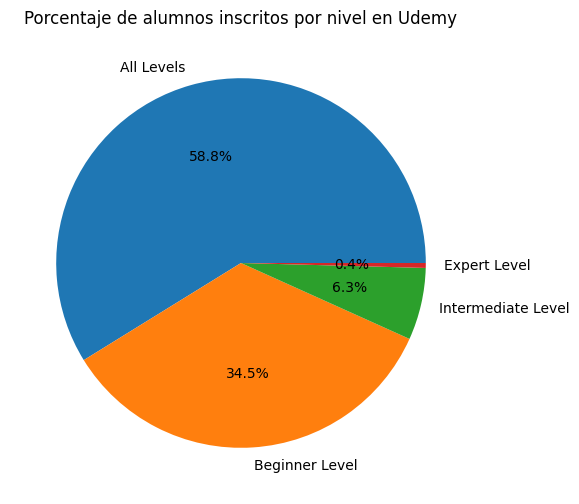

In [ ]:
# Agrupar los datos por 'level' y calcular la suma de 'num_subscribers'
grouped_data = df_uc.groupby('level')['num_subscribers'].sum().reset_index()

# Ordenar los datos por 'num_subscribers' de forma descendente
grouped_data = grouped_data.sort_values('num_subscribers', ascending=False)

# Crear el gráfico de pie
plt.figure(figsize=(10, 6))
plt.pie(grouped_data['num_subscribers'], labels=grouped_data['level'], autopct='%1.1f%%')

# Título del gráfico
plt.title('Porcentaje de alumnos inscritos por nivel en Udemy')

# Mostrar el gráfico
plt.show()



Conclusión de Gráfico de Barras de cantida de alumnados por nivel en Udemy: La cantidad de alumnado por nivel es muy diferente, siendo el All Levels el nivel predominante, mientrás que Expert Level es significativamente inferior. Esto corresponde a la ley de oferta y demanda, la cantidad de cursos ofertados de All Levels son algo ambíguos, pero al haber una mayor cantidad de cursos de niveles introductorios, el alumnado inscrito en ellos es superior al de niveles avanzados. También esto pueda deberse a que cuando se accede a niveles de conocimiento más avanzados se buscan sitios más especializados en la materia como universidades convencionales o clubes del área. 

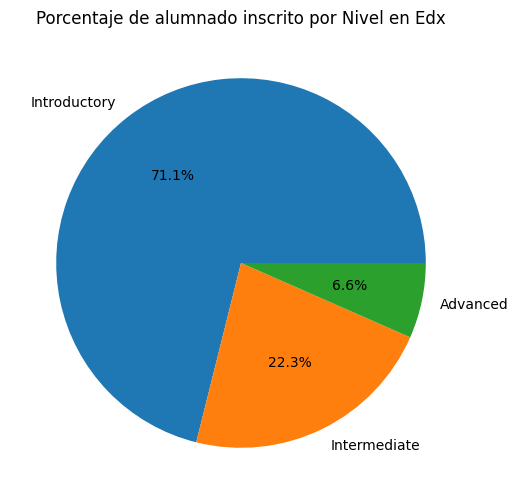

In [ ]:
# Agrupar los datos por 'Level' y calcular la suma de 'n_enrolled'
grouped_data = df_ec.groupby('Level')['n_enrolled'].sum().reset_index()

# Ordenar los datos por 'n_enrolled' de forma descendente
grouped_data = grouped_data.sort_values('n_enrolled', ascending=False)

# Crear el gráfico de pie
plt.figure(figsize=(10, 6))
plt.pie(grouped_data['n_enrolled'], labels=grouped_data['Level'], autopct='%1.1f%%')

# Título del gráfico
plt.title('Porcentaje de alumnado inscrito por Nivel en Edx')

# Mostrar el gráfico
plt.show()


Conclusión de cantidad de alumnado inscrito por nivel en Edx: Los niveles introductorios acaparan la mayor cantidad de alumnos inscritos en la plataforma, alrededor de un 1/5 de los alumnos inscritos pertenecen a cursos intermedios y unicamente un 6% a cursos avanzados. Esta información es también congruente con la cantidad de cursos ofertados por la plataforma donde se observa que la mayoría son de nivel introductorio. 

### Filtro Precio

In [98]:
# Combinar las columnas 'course_title' de df_uc y 'title' de df_ec en la columna 'Curso' de df_mezcla
df_mezcla = pd.DataFrame({
    'Curso': df_uc['course_title'].tolist() + df_ec['title'].tolist(),
    'Precio': df_uc['price'].tolist() + df_ec['price_extracted'].tolist(),
    'Inscritos': df_uc['num_subscribers'].tolist()+df_ec['n_enrolled'].tolist()
})

# Ordenar el dataframe por el precio de forma descendente
df_mezcla = df_mezcla.sort_values('Precio', ascending=False)

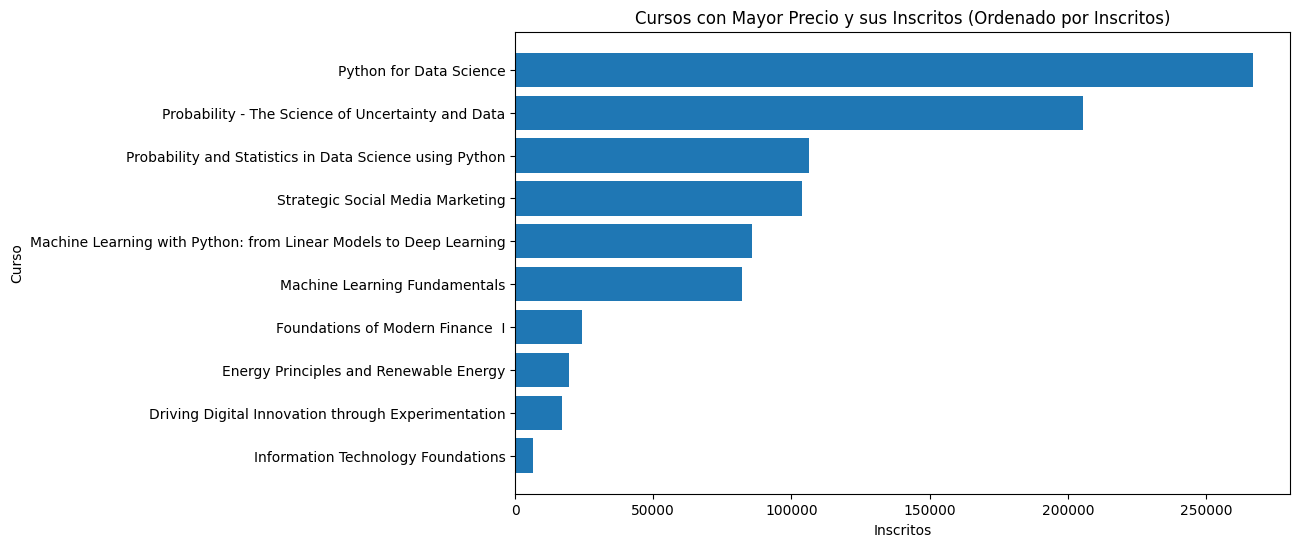

In [ ]:
# Filtrar los cursos con mayor precio
cursos_mayor_precio = df_mezcla.head(10)

# Ordenar los cursos por el número de inscritos de forma descendente
cursos_mayor_precio = cursos_mayor_precio.sort_values('Inscritos', ascending=True)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(cursos_mayor_precio['Curso'], cursos_mayor_precio['Inscritos'])

# Etiquetas y título del gráfico
plt.xlabel('Inscritos')
plt.ylabel('Curso')
plt.title('Cursos con Mayor Precio y sus Inscritos (Ordenado por Inscritos)')

# Mostrar el gráfico
plt.show()



Conclusión de Diagrama de Barras de Cursos con 10 cursos de mayor precio y con mayor cantidad de alumnado inscrito: Se observa una gran presencia de tópicos enfocados en TI y tecnologías, podría inlcuir tópicos de estádistica como una herramienta en la formación de científicos de datos de manera que la formación con mayor alumnado inscrito 5 de los primeros 6 serían enfocados en la matrícula convencional de un estudiante en formación de TI.

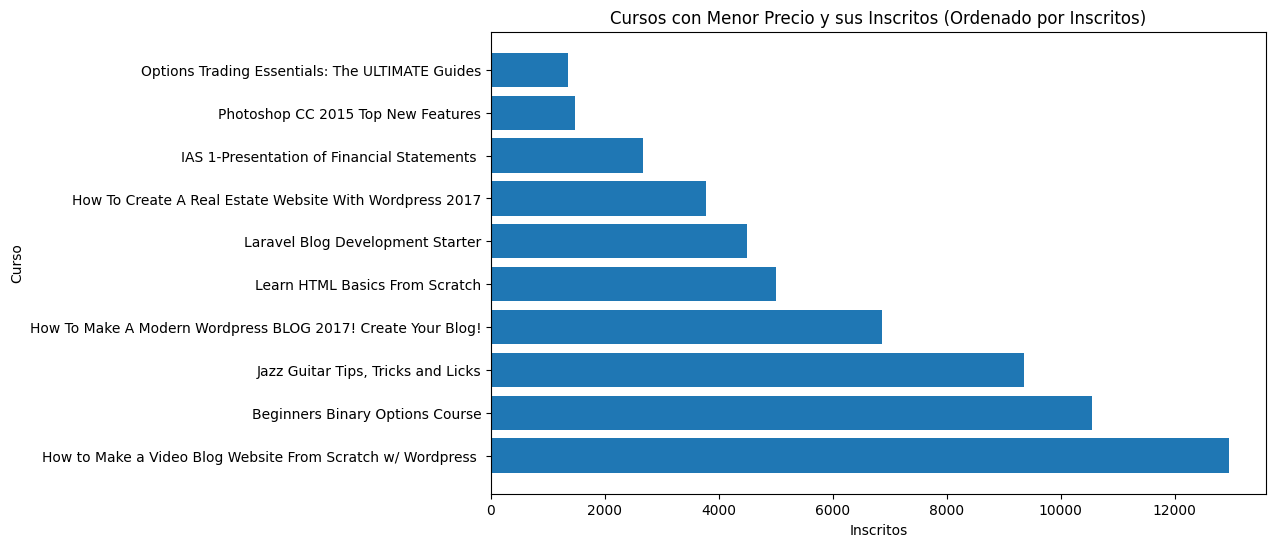

In [ ]:
#Cursos más baratos top 10
cursos_menor_precio = df_mezcla.tail(10)

# Ordenar los cursos por el número de inscritos de forma descendente
cursos_menor_precio = cursos_menor_precio.sort_values('Inscritos', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(cursos_menor_precio['Curso'], cursos_menor_precio['Inscritos'])

# Etiquetas y título del gráfico
plt.xlabel('Inscritos')
plt.ylabel('Curso')
plt.title('Cursos con Menor Precio y sus Inscritos (Ordenado por Inscritos)')

# Mostrar el gráfico
plt.show()


Conclusión Cursos más baratos con mayor cantidad de inscritos: Se observa que varios de los cursos pertenecen a la rama de diseño,algunos de TI, sin embargo, lo más llamativo es su escala en el eje x, de entre los 10 cursos con menor precio (incluídos aquellos que son gratuitos) el que mayor número de inscritos tienes es de 12 mil. Muy diferentes a comparación de los cursos de paga. Esto puede justificar el comportamiento del KPI tasa de conversión donde se confirmó que los cursos pagados captan mayor número de inscritos en comparación con los gratuitos.

# 6. KPI

### Tasa de Conversión por condición de pago o gratuito

In [ ]:
# Obtener el numerador: num_subscribers cuando is_paid es True
num_paid = df_uc.loc[df_uc['is_paid'] == True, 'num_subscribers'].sum()

# Obtener el denominador: num_subscribers cuando is_paid es False
num_free = df_uc.loc[df_uc['is_paid'] == False, 'num_subscribers'].sum()

# Calcular la tasa de conversión
tasa_conversion_pago = num_paid / num_free *100

print('Tasa de Conversión Pago en Udemy en porcentaje es: {:.2f}'.format(tasa_conversion_pago))


Tasa de Conversión Pago en Udemy en porcentaje es: 228.88


Conclusión KPI Tasa de Conversión: Los contenidos de pago atraen a 2 personas por cada 1 inscrita en algún contenido gratuito en Udemy. Lo que puede sugerir que la inversión en contenido de pago representaría el mejor acercamiento al área de negocio. A continuación se evalúa el mismo KPI evaluado al siguiente año con un crecimiento del 15%. 

In [ ]:
tasa_conversion_pago_futura = num_paid / num_free *115

print('Tendencia a esperar para un óptimo crecimiento en un año: {:.2f}'.format(tasa_conversion_pago_futura))

Tendencia a esperar para un óptimo crecimiento en un año: 263.21


Conclusión KPI Tasa de Conversión Futura: Se espera que el número de suscriptores de contenido de paga aumente de un 2.28 (entendiendose como 2.28 personas que consumen contenido de paga por cada 1 de contenido gratuito) a 2.63. Para conseguirlo se debe de incrementar la media de retención de clientes de consumo pagado o bien, bajar la tasa de consumidores de contenido gratuito. 

### Tasa de suscripción en cursos por subject

In [ ]:
web_dev_mean = df_uc.loc[df_uc['subject'] == 'Web Development', 'num_subscribers'].mean()
other_mean = df_uc.loc[df_uc['subject'] != 'Web Development', 'num_subscribers'].mean()
ratio = web_dev_mean / other_mean
print('Tasa de subscripción de TI en Udemy es: {:.2f}'.format(ratio))

Tasa de subscripción de TI en Udemy es: 4.36


Conclusión KPI Tasa de Subscripción de TI: Este KPI se construye de la razón de la media los cursos con el subject "Web Development" sobre la media de los cursos de las otras áreas. Se comprueba que el rendimiento promedio de suscriptores en cursos de TI (en este caso, Web Development) es de 4 personas por cada 1 persona inscrita en alguna de los otros cursos. Podría significar que debido a tendencias sociales el consumo de productos enfocados en tecnologías son sustancialmente mayores en comparación a otros tópicos. A continuación se evalúa la perspectiva futura del KPI donde se espera una tasa de crecimiento 20%.

In [ ]:
ratio_futuro= web_dev_mean / other_mean *1.2
print('Tasa de subscripción futura de TI en Udemy es: {:.2f}'.format(ratio_futuro))

Tasa de subscripción futura de TI en Udemy es: 5.23


Conclusión KPI Tasa de Susbcripción Futura de TI: Se espera que halla 5 personas suscritas por cada persona suscrita a algún tópico diferente a TI en Udemy. 

### Tasa de Ingreso por Curso Por Nivel

In [ ]:
advanced_courses_uc = df_uc[df_uc['level'] == 'Expert Level']
non_advanced_courses_uc = df_uc[(df_uc['level'] != 'Expert Level') & (df_uc['level'] != 'All Levels')]
advanced_income_mean_uc = advanced_courses_uc['ingreso_por_curso'].mean()
non_advanced_income_mean_uc = non_advanced_courses_uc['ingreso_por_curso'].mean()


advanced_courses_ec = df_ec[df_ec['Level'] == 'Advanced']
non_advanced_courses_ec = df_ec[(df_ec['Level'] != 'Advanced')]
advanced_income_mean_ec = advanced_courses_ec['ingreso_por_curso'].mean()
non_advanced_income_mean_ec = non_advanced_courses_ec['ingreso_por_curso'].mean()


#Establecimiento de KPI
kpi_level = (advanced_income_mean_uc+advanced_income_mean_ec) / (non_advanced_income_mean_uc + non_advanced_income_mean_ec)

#Imprimir valor
print('Tasa de Ingreso por Curso Avanzado en comparación a otros niveles es : {:.2f}'.format(kpi_level))

Tasa de Ingreso por Curso Avanzado en comparación a otros niveles es : 1.68


Conclusión KPI Tasa de Ingreso por Curso de Nivel Avanzado: Los cursos de nivel avanzado a pesar de tener un número de suscritos menor que otros niveles como Introductorio y por su especialidad ser menos frecuentes, parece que comparandolos con otras tasas obtenidas es la única con un cociente positivo, indicando que por cada dolar obtenido (entendiendose de la multiplicación de inscritos por precio) de cursos de otro nivel, el nivel avanzado obtiene 68% más en comparación con los demás. Cabe recalcar la posiblidad de enmarcar este valor dado su alto precio a raíz de la especialidad brindada. 

In [ ]:

#Establecimiento de KPI futura
kpi_level_futuro = 1.15*(advanced_income_mean_uc+advanced_income_mean_ec) / (non_advanced_income_mean_uc + non_advanced_income_mean_ec)

#Imprimir valor
print('Tasa de Ingreso por Curso Avanzado Futura con un 15% de crecimiento es en comparación a otros niveles es : {:.2f}'.format(kpi_level_futuro))

Tasa de Ingreso por Curso Avanzado Futura con un 15% de crecimiento es en comparación a otros niveles es : 1.93


Conclusión KPI Tasa de Ingreso por Curso de Nivel Avanzado Futuro: Tras un año, el crecimiento, se espera de del 15%, lo que acercaría demasiado el valor de ingreso de cursos avanzados en comparación con otros en 200%. Parece que la inversión en cursos de nivel avanzado a pesar de ser de un posible riesgo por su poca frecuencia y por ende, subpopularidad en comparación con otros niveles, representa mayores ganancias monetarias. 

### Tasa de Ingreso por Curso de acuerdo al esfuerzo total

In [ ]:
filtro = df_ec['esfuerzo_group_str'].isin(['(100.0, inf]','(80.0, 100.0]'])
df_filtered = df_ec[filtro]

# Calcular el promedio de ingreso_por_curso para los grupos filtrados
promedio_filtered = df_filtered['n_enrolled'].mean()

# Filtrar los grupos excluyendo los rangos (['(100,inf]','(80.0,100]'])
filtro_excluido = ~df_ec['esfuerzo_group_str'].isin(['(100.0, inf]','(80.0, 100.0]'])
df_excluido = df_ec[filtro_excluido]

# Calcular el promedio de ingreso_por_curso para los grupos excluidos
promedio_excluido = df_excluido['n_enrolled'].mean()

# Calcular el KPI como la división entre los promedios
kpi_esfuerzo = promedio_filtered / promedio_excluido
print("La tasa del promedio de Ingreso por cursos largos (más de 80 h en total) en comparación a cursos regulares y cortos es de: ", kpi_esfuerzo)

La tasa del promedio de Ingreso por cursos largos (más de 80 h en total) en comparación a cursos regulares y cortos es de:  2.3587928521293753


Conclusión KPI Tasa de Ingreso por Curso de acuerdo al esfuerzo total: Aquellos cursos que se ubican en los grupos de 80 h por delante, representan un mayor ingreso para la empresa en comparación a cursos menos exigentes. Esto podría deberse al precio de los cursos más extensos, a que es atractivo para el consumidor el comprar un producto amplio con conocimiento que puede ser explotado en un mayor espacio temporal. Cabe recalcar que a pesar de que no son los cursos más frecuentes representan el mayor ingreso por curso de los grupos de esfuerzo divididos. 

In [ ]:
# Calcular el KPI como la división entre los promedios
kpi_esfuerzo_futuro = promedio_filtered / promedio_excluido *1.1
print("El crecimiento del KPI basado en el esfuerzo de curso para un 10% debe de ser de: ", kpi_esfuerzo_futuro)

El crecimiento del KPI basado en el esfuerzo de curso para un 10% debe de ser de:  2.594672137342313


Conclusión KPI Tasa de Ingreso por Curso por Esfuerzo de cursos futuro: Se espera un crecimiento que pueda ser traducido en que aproximadametne 2.6 dolares sean percibidos por la empresa por cada curso largo en comparación a cursos promedio (de 40-80 h) y cursos cortos (menores a 40 h)

# 7. Exportación de datasets

In [ ]:
df_cc.to_csv('df_cc.csv', index=False)
df_ec.to_csv('df_ec.csv', index=False)
df_uc.to_csv('df_uc.csv', index=False)

In [ ]:
df_cr.to_csv('df_cr.csv', index=False)

# 8. Conclusiones de datos

Los datos provisto por Udemy son muy útiles para establecer seguimiento mediante temática por la existencia de únicamente 4 subjects y los niveles, se observa una predominancia de Web Development en el catálogo que puede deberser al auge en la decada de 2010's de la programación orientada a sitios web y el nacimiento de esta plataforma educativa.

Coursera provee de 3 caracteríticas muy relevantes, el número de calificaciones obtenidas, rating y las instituciones que los brindan. Las 2 primeras pueden ser utilizadas para trazar una línea de tendencia a encontrar la popularidad de centros educativos para poder cotizar aquellos cursos que son más populares y estén disponibles de ellos. Cabe resaltar que la falta de temática complico el análisis por otras áreas como subject o nivel. 

Los datos de Edx son útiles por su cantidad de variables numéricas, la creación de marca de clase para el tiempo de esfuerzo de curso multiplicando por el tiempo en semanas previsto permitió la generación de la variable esfuerzo total, los precios fueron extráidos y con el número de suscriptores fue posible obtener la cantidad de ingreso por curso y filtrando por temática, permitió la evaluación de diversas KPI. Cabe resaltar que a pesar de ser un gran rango de variables numéricas, muchas de ellas fueron incorporadas en otras para permitir análisis más sencillos (Tal es el caso de las antes mencionadas, números inscritos y precio, por brindar un ejemplo).

Las características que precisan un mayor desempeño para la longitud de un curso, son aquellos que resultan ser más extensos, esto es posible debido a la seguridad de encontrar información por parte del consumidor, distinto a la idea inicial de un contenido más ligero. Se espera que cursos largos, puedan brindar una mayor perspectiva, también cabe resaltar que cursos brindados por empresas como Google y IBM son ofertados en algunas plataformas de las analizadas, mismas que te capacitan para ejercer como analista de datos mediante un curso intensivo de 6 meses, siendo uno de los más populares del áreas para la preparación profesional. Por otra parte, la evaluación del KPI de tasa de conversión de suscritos es útil para evaluar la fidelidad del cliente, debido a la tendencia de consumidores de contenido de gratis es a casi no terminar el producto mientras que la existencia de un intercambio comercial por él, asegura fidelidad y esto aumenta la posibilidad de consumir un segundo curso. Los cursos que parecen ser más eficientes en términos de alumnos inscritos son los de TI como Web Development o Data Analysis, mismos que sobrepasan a otras temáticas casi 500%. Para concluir, la evaluación del nivel a pesar de tener una hipótesis inicial de cursos introductorios, parece que la oferta tiende a contar con una gran cantidad de cursos para principiantes disponibles en múltiples plataformas, mientras que la oferta de contenido especializado es más escasa y por ello, es posible que la demanda sea alta, asegurando un pago consideradable por ese contenido comprobado por el ingreso por curso.
Se puede concluir que la mejor combinación de inversión en cursos serían aquellos de temática de TI, con una duración larga mayor a 80 h en total de contenido siendo posible percibir ganancias a partir de la subscripción a él. 